# 비어플 3주차 과제 - 따릉이 데이터 EDA
#### 2022110484 장윤서

## 변수 설명 





Date (날짜) : year-month-day

Rented Bike count (자전거 대여량) :Count of bikes rented at each hour

Hour (그 날의 시간) : Hour of he day (0-23) 

Temperature (온도) : Temperature in Celsius

Humidity (습도) : %

Windspeed (풍속) : m/s

Visibility (가시성) : 10m

Dew point temperature (이슬점 온도)  : Celsius

Solar radiation (태양 복사) : MJ/m2

Rainfall (강우량) : mm

Snowfall (강설량) : cm

Seasons (계절) :Winter, Spring, Summer, Autumn #범주형

Holiday (휴일) :Holiday/No holiday             #범주형 

Functional Day(운영시간) : Yes/No   #범주형



## 라이브러리 불러오기 

In [192]:
#라이브러리 임포트하기 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

# 결측치 확인하는 라이브러리
import missingno as msno 

# 다중대체 라이브러리
from fancyimpute import IterativeImputer

# seaborn의 다른 라이브러리
import seaborn.objects as so

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기 

In [296]:
bike=pd.read_csv('C:/Users/jys72/code/SeoulBikeData_NaN.csv',encoding='ISO-8859-1')

In [297]:
df=bike.copy() # 원본 데이터 손실 방지를 위한 copy

## EDA

In [195]:
df.head(10) # 앞의 5개 행 추출 

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,6,01/12/2017,181,6,NaN,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,8,01/12/2017,930,8,NaN,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [196]:
df.tail()

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### 변수변환

In [256]:
#변수 타입 확인하기 
df.info()  #날짜변수 ,계절변수, Holiday,Functioning Day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  8760 non-null   int64  
 1   Date                        8760 non-null   object 
 2   Rented Bike Count           8760 non-null   int64  
 3   Hour                        8760 non-null   int64  
 4   Temperature(Â°C)            7884 non-null   float64
 5   Humidity(%)                 8760 non-null   int64  
 6   Wind speed (m/s)            7884 non-null   float64
 7   Visibility (10m)            8760 non-null   int64  
 8   Dew point temperature(Â°C)  8760 non-null   float64
 9   Solar Radiation (MJ/m2)     8760 non-null   float64
 10  Rainfall(mm)                8760 non-null   float64
 11  Snowfall (cm)               8760 non-null   float64
 12  Seasons                     7884 non-null   object 
 13  Holiday                     8760 

In [271]:
#불필요변수 제거 
#df.drop('Unnamed: 0', axis=1, inplace=True)

In [272]:
df['Functioning Day'].unique()  # Functioning Day 변수는 Yes 와 No로 나타남

array(['Yes', 'No'], dtype=object)

In [273]:
df['Hour'].unique() #Hour 변수는 0-23시까지의 빌린 당일 시간을 나타냄 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [298]:
#날짜변수 변환하기 
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [299]:
# 범주형 변수 변환하기 
df['Seasons']=df['Seasons'].astype('category')
df['Holiday']=df['Holiday'].astype('category')
df['Functioning Day']=df['Functioning Day'].astype('category')

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  8760 non-null   int64         
 1   Date                        8760 non-null   datetime64[ns]
 2   Rented Bike Count           8760 non-null   int64         
 3   Hour                        8760 non-null   int64         
 4   Temperature(Â°C)            7884 non-null   float64       
 5   Humidity(%)                 8760 non-null   int64         
 6   Wind speed (m/s)            7884 non-null   float64       
 7   Visibility (10m)            8760 non-null   int64         
 8   Dew point temperature(Â°C)  8760 non-null   float64       
 9   Solar Radiation (MJ/m2)     8760 non-null   float64       
 10  Rainfall(mm)                8760 non-null   float64       
 11  Snowfall (cm)               8760 non-null   float64     

### 결측값 처리하기 

In [300]:
#결측값 확인하기 온도 , 풍속, 계절 변수 
df.isna().sum() 

Unnamed: 0                      0
Date                            0
Rented Bike Count               0
Hour                            0
Temperature(Â°C)              876
Humidity(%)                     0
Wind speed (m/s)              876
Visibility (10m)                0
Dew point temperature(Â°C)      0
Solar Radiation (MJ/m2)         0
Rainfall(mm)                    0
Snowfall (cm)                   0
Seasons                       876
Holiday                         0
Functioning Day                 0
dtype: int64

<Axes: >

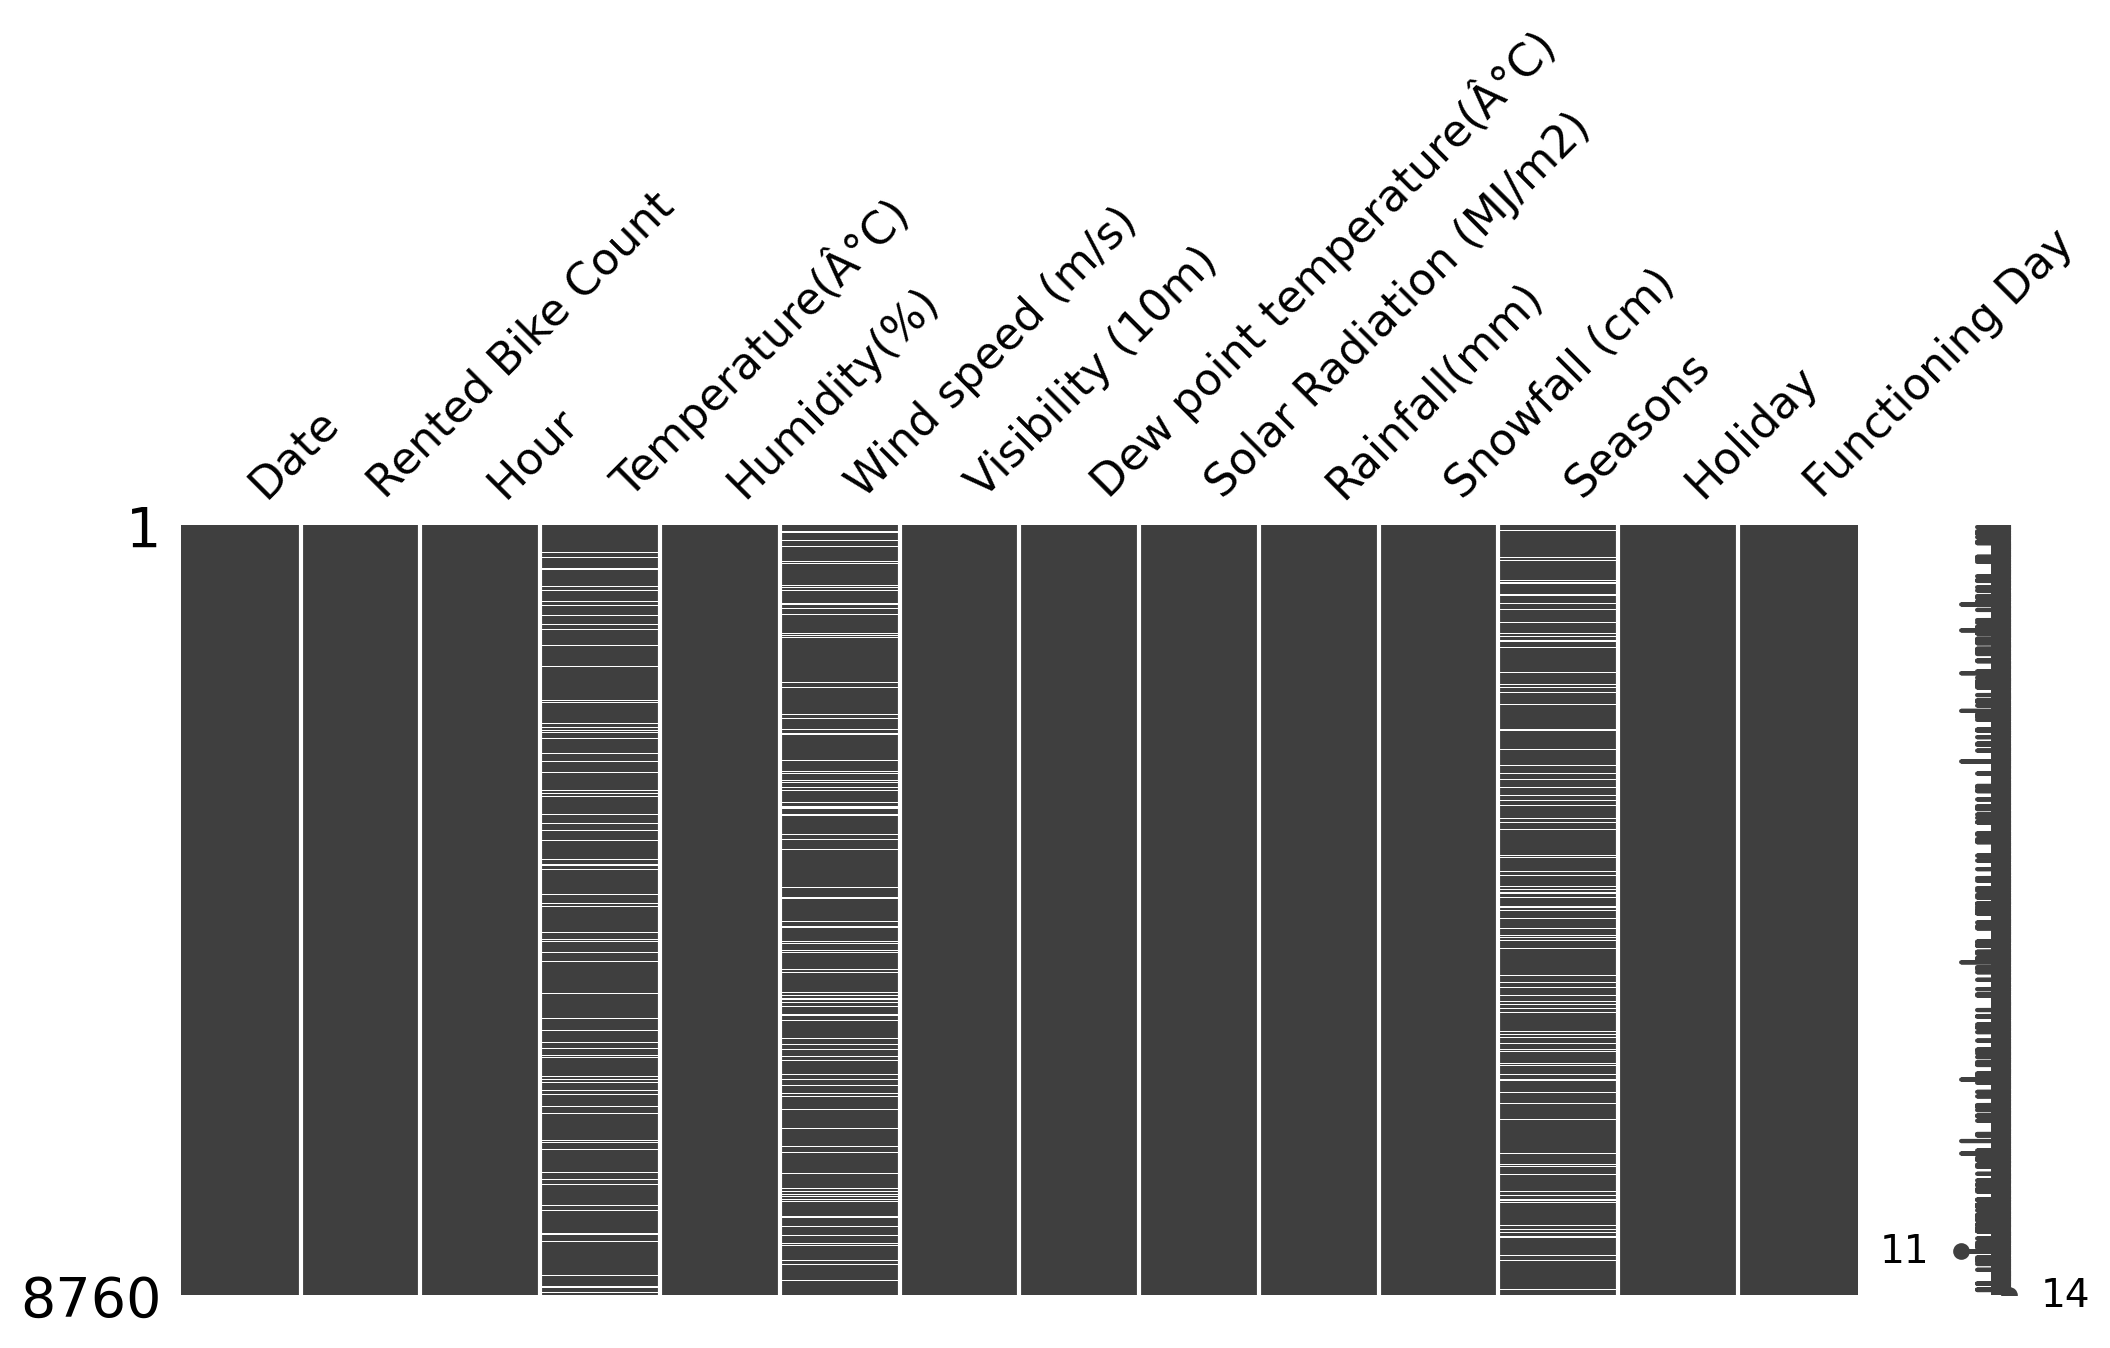

In [278]:
#결측값 시각화해서 살펴보기 
msno.matrix(df,figsize=(12,5))

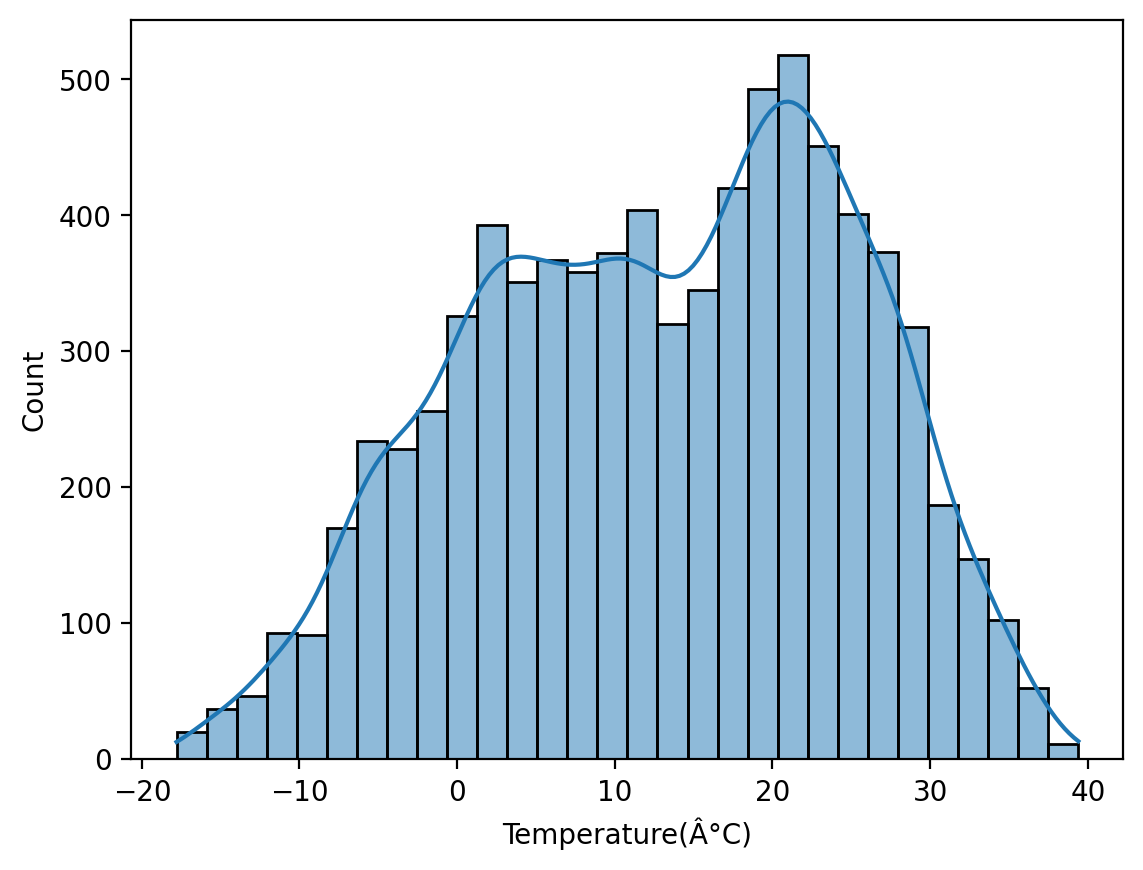

In [301]:
# 대체 -단일대체법: 온도변수 
sns.histplot(df['Temperature(Â°C)'],kde=True)
df2=df.copy()
df2['Temperature(Â°C)']=df['Temperature(Â°C)'].fillna(round(df['Temperature(Â°C)'].mean()))

#hist 를 그려봤을 때 큰 아웃라이어나 치우침이 없어서 평균으로 대체해도 될 거 같다 생각함 

In [302]:
df2._get_numeric_data().corr()['Wind speed (m/s)'].sort_values()

Humidity(%)                  -0.336105
Dew point temperature(Â°C)   -0.178011
Unnamed: 0                   -0.159671
Temperature(Â°C)             -0.032656
Rainfall(mm)                 -0.019080
Snowfall (cm)                -0.001319
Rented Bike Count             0.116558
Visibility (10m)              0.170671
Hour                          0.284573
Solar Radiation (MJ/m2)       0.331239
Wind speed (m/s)              1.000000
Name: Wind speed (m/s), dtype: float64

In [306]:
#대체-다른변수의 그룹별 대표값 : 풍속변수
df2['Wind speed (m/s)']=df.groupby(['Humidity(%)', 'Hour'])['Wind speed (m/s)'].transform(lambda x: x.fillna(x.median()))

In [303]:
#대체-최빈값으로 대체하기: 계절변수 
df2['Seasons']=df['Seasons'].fillna((df['Seasons'].mode()[0]))

In [308]:
#제거 
df2=df2.dropna()

In [309]:
df2.isna().sum()

Unnamed: 0                    0
Date                          0
Rented Bike Count             0
Hour                          0
Temperature(Â°C)              0
Humidity(%)                   0
Wind speed (m/s)              0
Visibility (10m)              0
Dew point temperature(Â°C)    0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                       0
Holiday                       0
Functioning Day               0
dtype: int64

### 이상치 처리하기 

In [310]:
df2.describe() 

,Unnamed: 0,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8729.000000,8729.000000,8729.000000,8729.000000,8729.000000,8729.000000,8729.000000,8729.000000,8729.000000,8729.000000,8729.000000
mean,4381.478062,705.081109,11.498453,13.032615,58.239775,1.717591,1436.580250,4.094581,0.569622,0.148734,0.073708
std,2528.608268,645.214392,6.922878,11.325006,20.332685,1.010156,608.009966,13.046935,0.869459,1.129934,0.429166
min,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2195.000000,191.000000,5.000000,4.800000,43.000000,1.000000,940.000000,-4.600000,0.000000,0.000000,0.000000
50%,4385.000000,505.000000,11.000000,13.000000,57.000000,1.500000,1696.000000,5.100000,0.010000,0.000000,0.000000
75%,6571.000000,1066.000000,17.000000,21.700000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,8759.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [211]:
# 따릉이 대여량의 평균은 약 700대이며 
# 따릉이를 대여하는 평균 시간은 11시이다 

Text(0.5, 1.0, 'correlation heatmap')

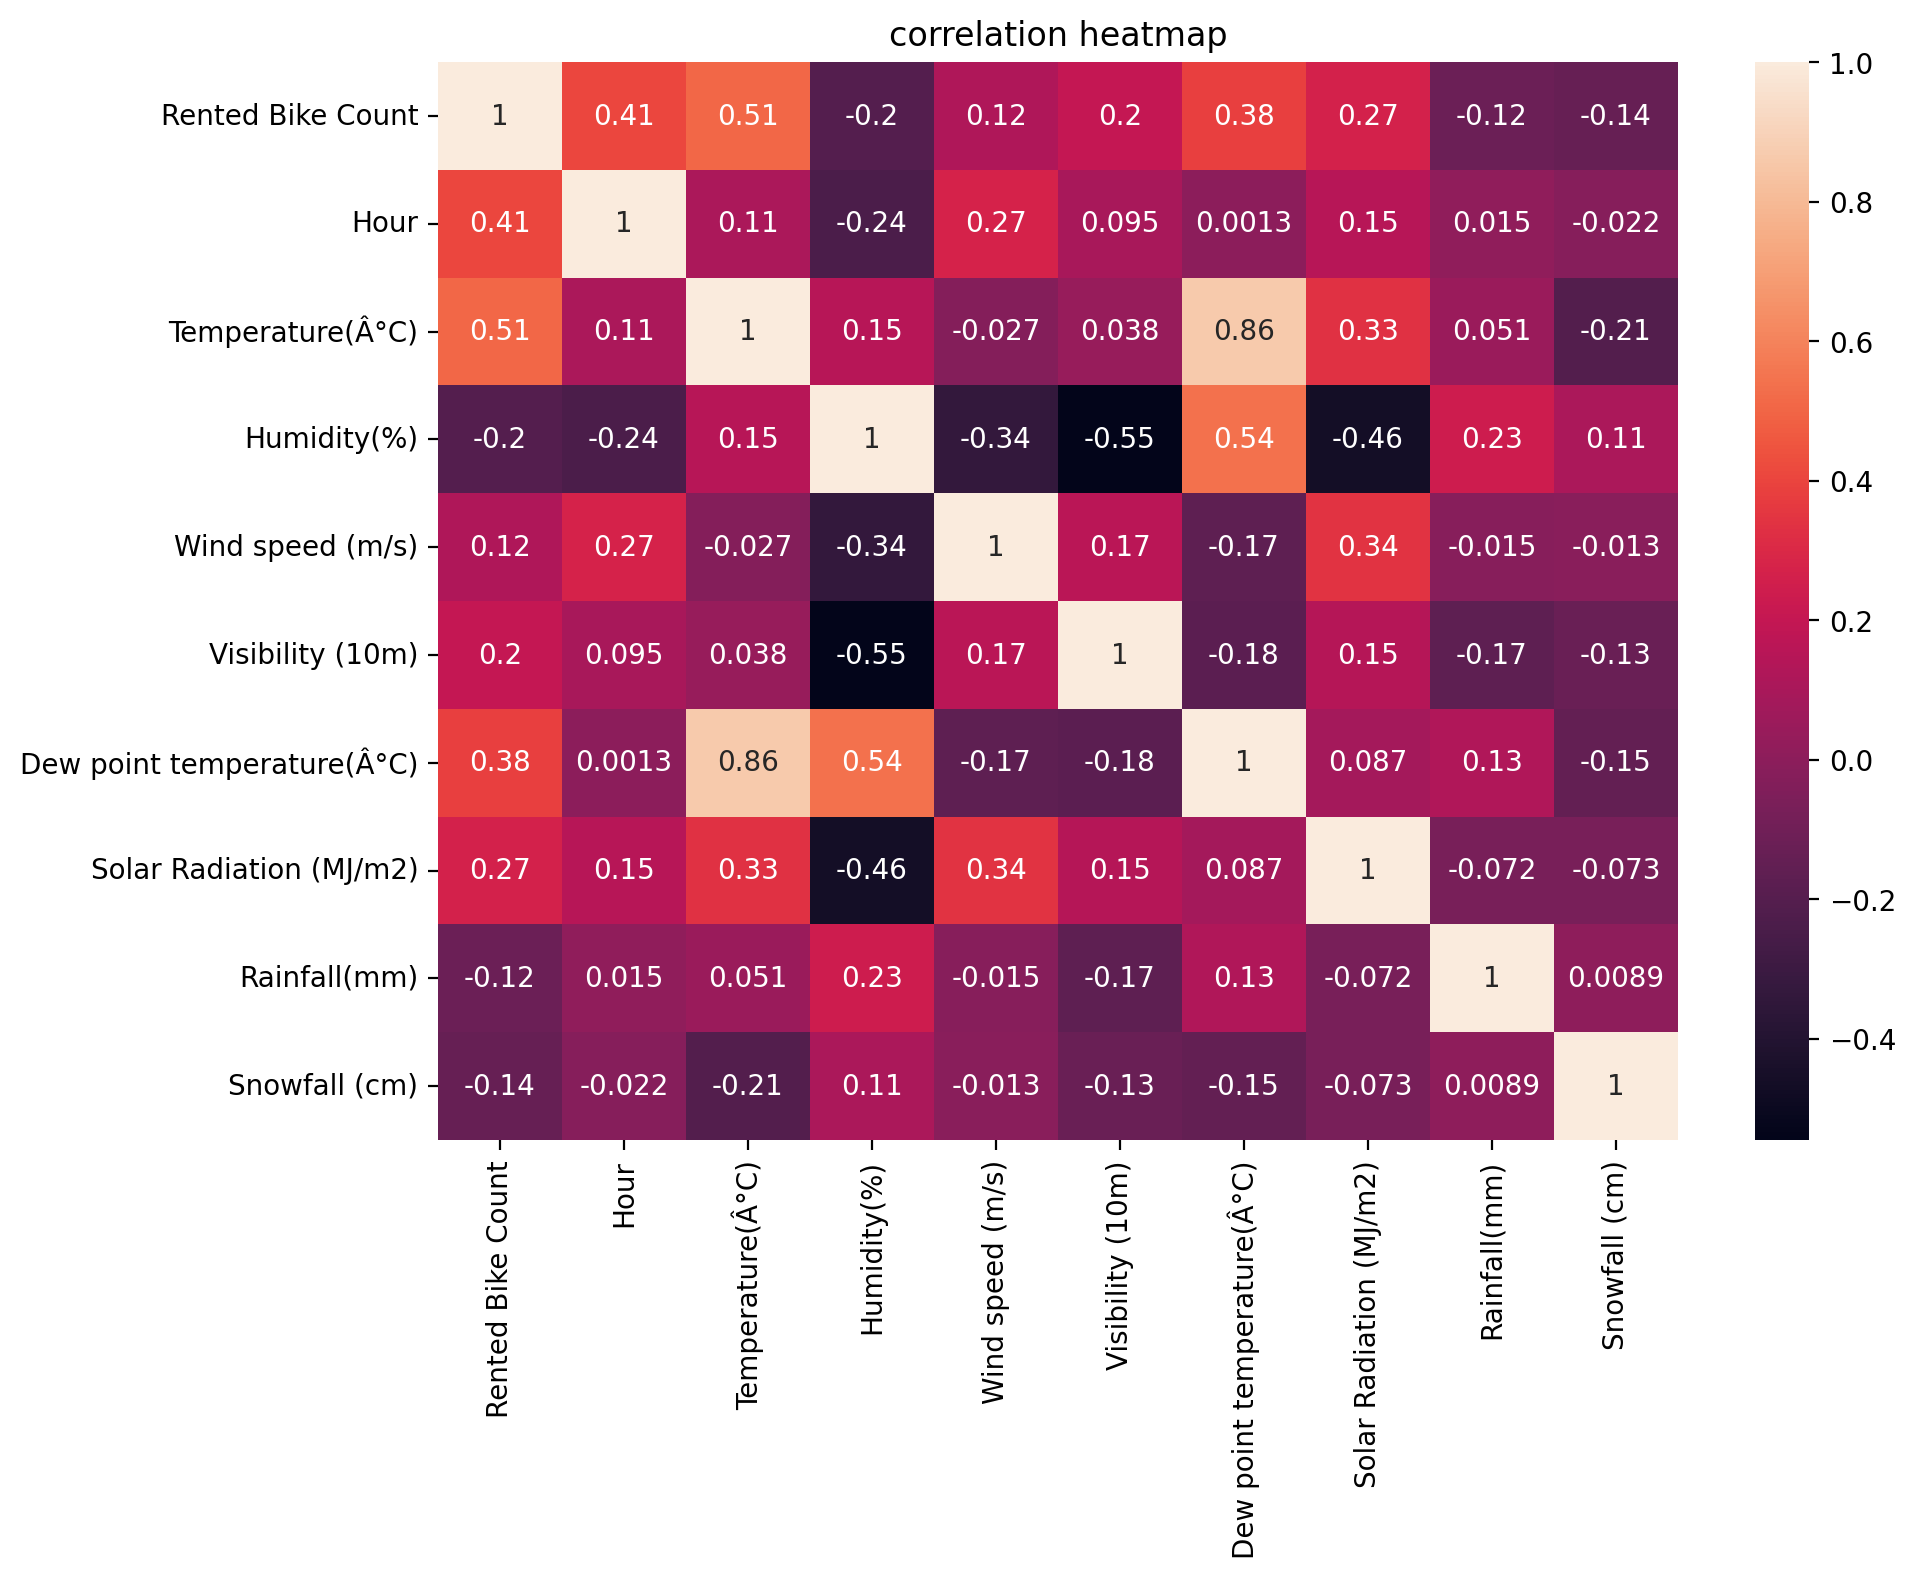

In [247]:
#변수별 상관관계 살펴보기 
plt.figure(figsize=(10,7))
sns.heatmap(df2.corr(),annot=True)
plt.title('correlation heatmap') #상관계수 행렬 히트맵

#### 온도와 따릉이 대여량간의 상관관계가 0.54로 높게 나타난다 
#### 그 다음으로는 시간대가 0.41로 높은 상관관계를 가진다
#### 온도와 이슬점 사이의 0.86으로 높은 상관관계를 가진다 
#### 가시성과 습도간의  -0.55로 높은 상관관계가 있다 
#### 습도와 이슬점 사이에 0.54로 높은 상관관계가 있다
#### 습도와 태양복사 에너지 간의 -0.46 으로 상관관계가 존재한다

## 예측 변수 : Rented Bike Count

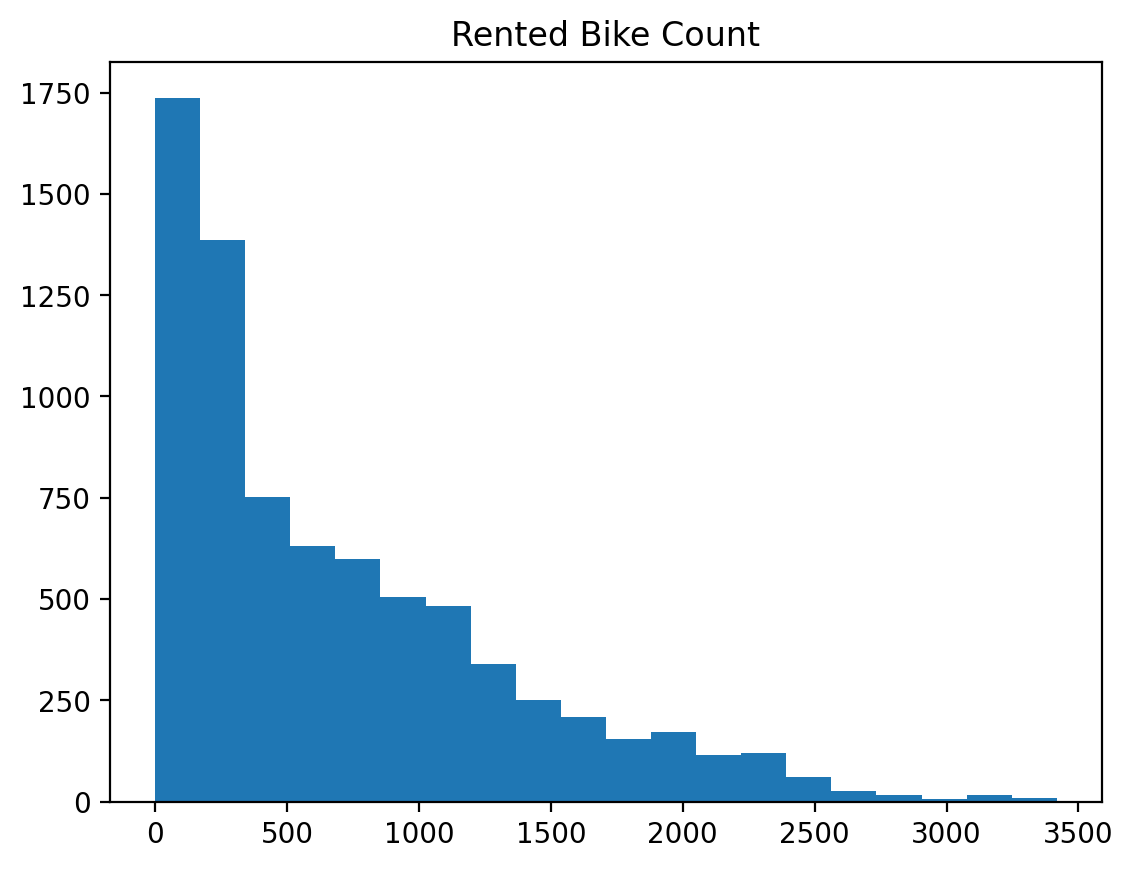

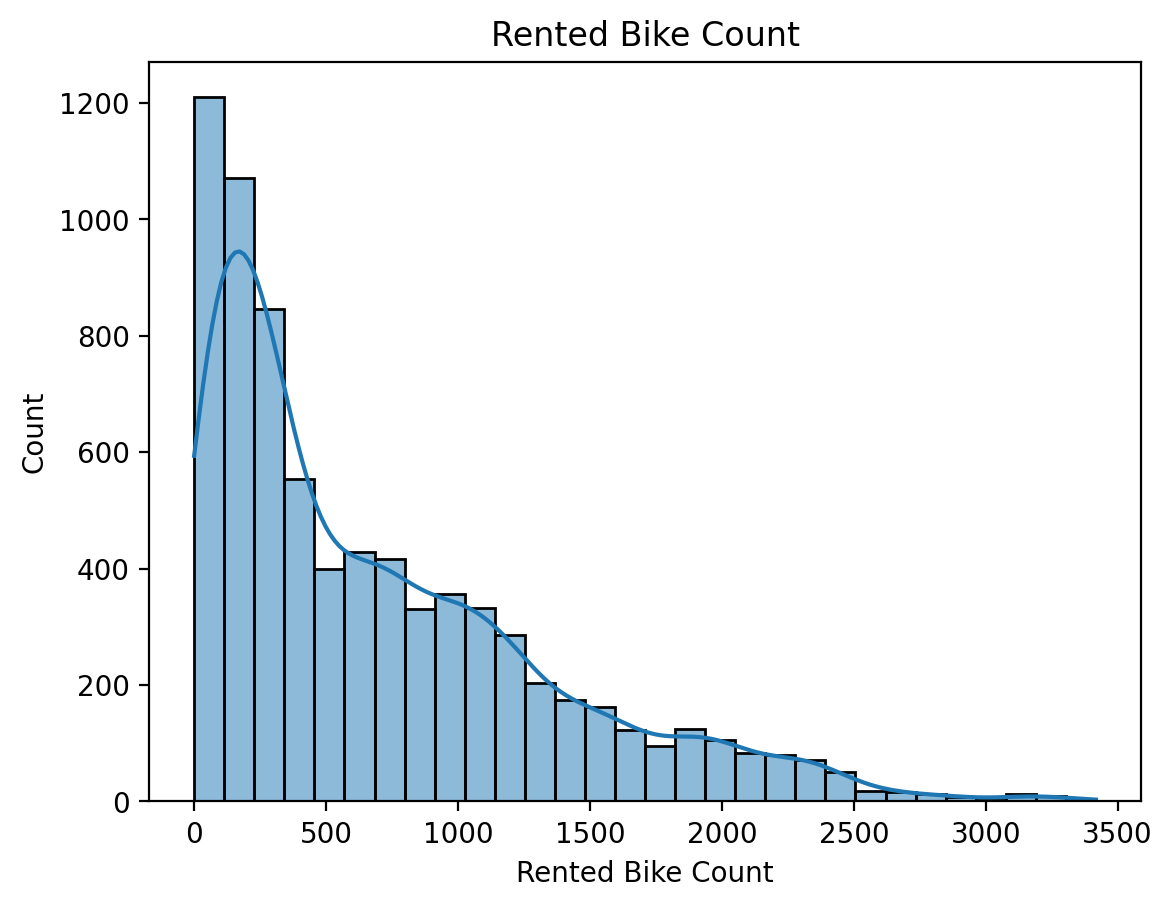

In [248]:
#히스토그램으로 나타내보기 
plt.hist(df2['Rented Bike Count'],bins=20)
plt.title('Rented Bike Count')
plt.show()

sns.histplot(df2['Rented Bike Count'],bins=30,kde=True)
plt.title('Rented Bike Count',fontsize=12)
plt.show()


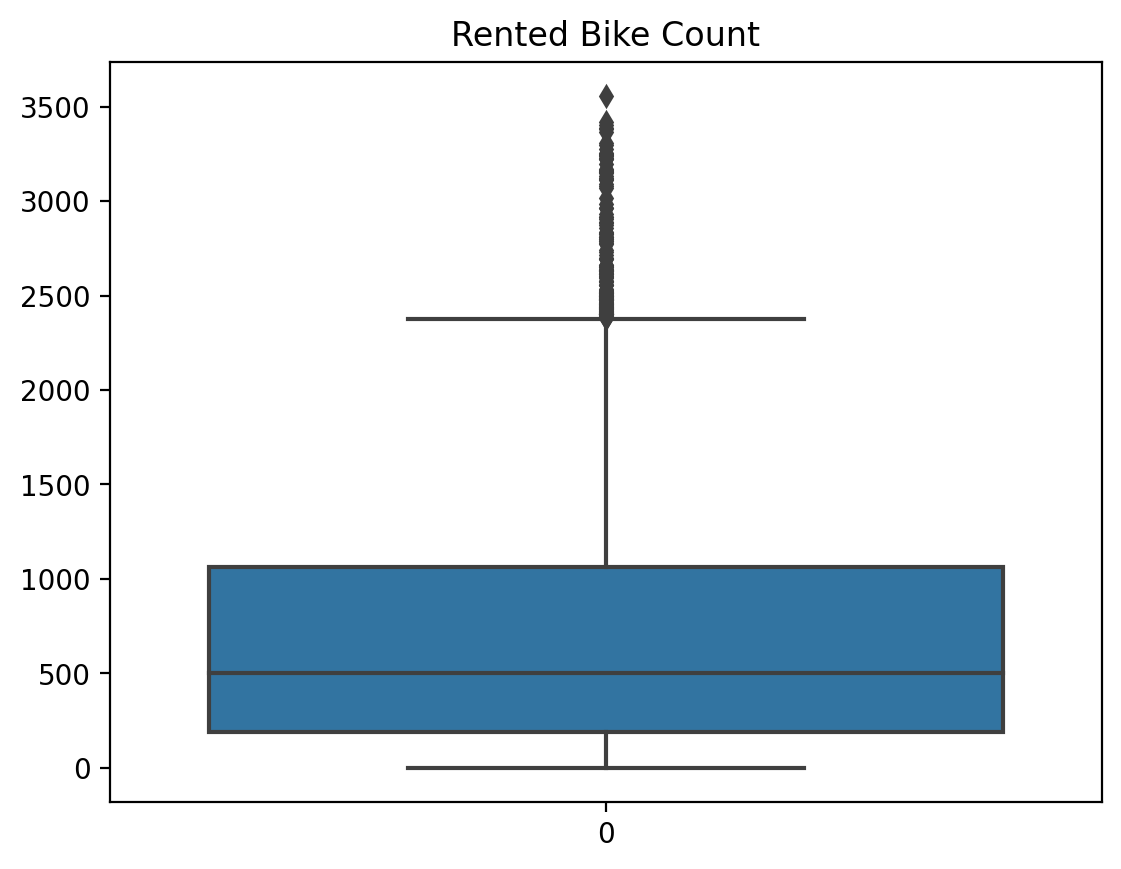

In [311]:
# 박스플롯(boxplot)으로 시각화
sns.boxplot(df2['Rented Bike Count'])
plt.title('Rented Bike Count')
plt.show()


#### 3500대는 나올수 있는 값이라 생각하므로 이상치로 처리하지 않기 

## Functioning 변수 

In [370]:
df2[df2['Functioning Day']=='No']['Rented Bike Count'].unique()
# 운영 안하는 날의 바이크 수는 0대이다 따라서 운영을 하는 날을 가지고서 분석을 진행하기 위해 나눈다 

array([0], dtype=int64)

In [371]:
#운영 안 하는 날만 따로 데이터 프레임을 만들었다
df3=df2[df2['Functioning Day']=='No']
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 3144 to 8255
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  295 non-null    int64         
 1   Date                        295 non-null    datetime64[ns]
 2   Rented Bike Count           295 non-null    int64         
 3   Hour                        295 non-null    int64         
 4   Temperature(Â°C)            295 non-null    float64       
 5   Humidity(%)                 295 non-null    int64         
 6   Wind speed (m/s)            295 non-null    float64       
 7   Visibility (10m)            295 non-null    int64         
 8   Dew point temperature(Â°C)  295 non-null    float64       
 9   Solar Radiation (MJ/m2)     295 non-null    float64       
 10  Rainfall(mm)                295 non-null    float64       
 11  Snowfall (cm)               295 non-null    float64   


#### 이용약관에 따르면 기상악화현상이 일어나는 경우 따릉이의 이용이 중지될 수도 있다고 함 => 예로 폭우가 있다 

#### 따라서 강우량, 강설량 , 풍속 변수를 확인하기

In [389]:
#따릉이가 운행을 안한 날짜 확인해보기 
df3['Date'].unique()

array(['2018-04-11T00:00:00.000000000', '2018-05-10T00:00:00.000000000',
       '2018-09-18T00:00:00.000000000', '2018-09-19T00:00:00.000000000',
       '2018-09-28T00:00:00.000000000', '2018-09-30T00:00:00.000000000',
       '2018-10-02T00:00:00.000000000', '2018-10-04T00:00:00.000000000',
       '2018-10-06T00:00:00.000000000', '2018-10-09T00:00:00.000000000',
       '2018-11-03T00:00:00.000000000', '2018-11-06T00:00:00.000000000',
       '2018-11-09T00:00:00.000000000'], dtype='datetime64[ns]')

In [392]:
#운행 안 한 날짜에 특별한 다른 점이 없는 것 같음... 폭우나 강풍으로 인한 운행중지로 생각했으나 아님
df3[df3['Date']=='2018-04-11']

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,SR_log
3144,3144,2018-04-11,0,0,13.0,82,4.60,1041,11.3,0.00,0.0,0.0,Spring,No Holiday,No,0.000000
3145,3145,2018-04-11,0,1,13.6,81,3.60,886,10.3,0.00,0.0,0.0,Spring,No Holiday,No,0.000000
3146,3146,2018-04-11,0,2,12.7,80,3.90,885,9.3,0.00,0.0,0.0,Spring,No Holiday,No,0.000000
3147,3147,2018-04-11,0,3,11.6,81,3.10,687,8.4,0.00,0.0,0.0,Spring,No Holiday,No,0.000000
3148,3148,2018-04-11,0,4,10.2,83,3.50,554,7.4,0.00,0.0,0.0,Spring,No Holiday,No,0.000000
3149,3149,2018-04-11,0,5,9.7,84,1.70,447,7.1,0.00,0.0,0.0,Spring,No Holiday,No,0.000000
3150,3150,2018-04-11,0,6,9.0,86,2.00,442,6.7,0.00,0.0,0.0,Spring,No Holiday,No,0.000000
3151,3151,2018-04-11,0,7,8.8,85,1.10,438,6.4,0.11,0.0,0.0,Spring,No Holiday,No,0.104360
3152,3152,2018-04-11,0,8,9.7,77,1.60,519,5.8,0.68,0.0,0.0,Spring,No Holiday,No,0.518794
3153,3153,2018-04-11,0,9,11.8,59,2.10,975,4.0,1.44,0.0,0.0,Spring,No Holiday,No,0.891998


In [398]:
df3[df3['Date']=='2018-05-10']

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,SR_log
3840,3840,2018-05-10,0,0,14.5,63,0.90,2000,7.5,0.00,0.0,0.0,Spring,No Holiday,No,0.000000
3841,3841,2018-05-10,0,1,13.0,66,1.00,1960,7.6,0.00,0.0,0.0,Spring,No Holiday,No,0.000000
3842,3842,2018-05-10,0,2,13.1,73,1.90,1895,8.3,0.00,0.0,0.0,Spring,No Holiday,No,0.000000
3843,3843,2018-05-10,0,3,12.9,74,1.70,1698,8.3,0.00,0.0,0.0,Spring,No Holiday,No,0.000000
3844,3844,2018-05-10,0,4,12.0,79,1.20,1351,8.4,0.00,0.0,0.0,Spring,No Holiday,No,0.000000
3845,3845,2018-05-10,0,5,11.5,80,0.90,974,8.1,0.00,0.0,0.0,Spring,No Holiday,No,0.000000
3846,3846,2018-05-10,0,6,11.4,80,1.00,885,8.0,0.02,0.0,0.0,Spring,No Holiday,No,0.019803
3847,3847,2018-05-10,0,7,12.1,71,0.60,876,6.9,0.34,0.0,0.0,Spring,No Holiday,No,0.292670
3848,3848,2018-05-10,0,8,13.0,63,2.20,1211,6.5,1.01,0.0,0.0,Spring,No Holiday,No,0.698135
3849,3849,2018-05-10,0,9,15.5,55,1.70,1318,6.4,1.76,0.0,0.0,Spring,No Holiday,No,1.015231


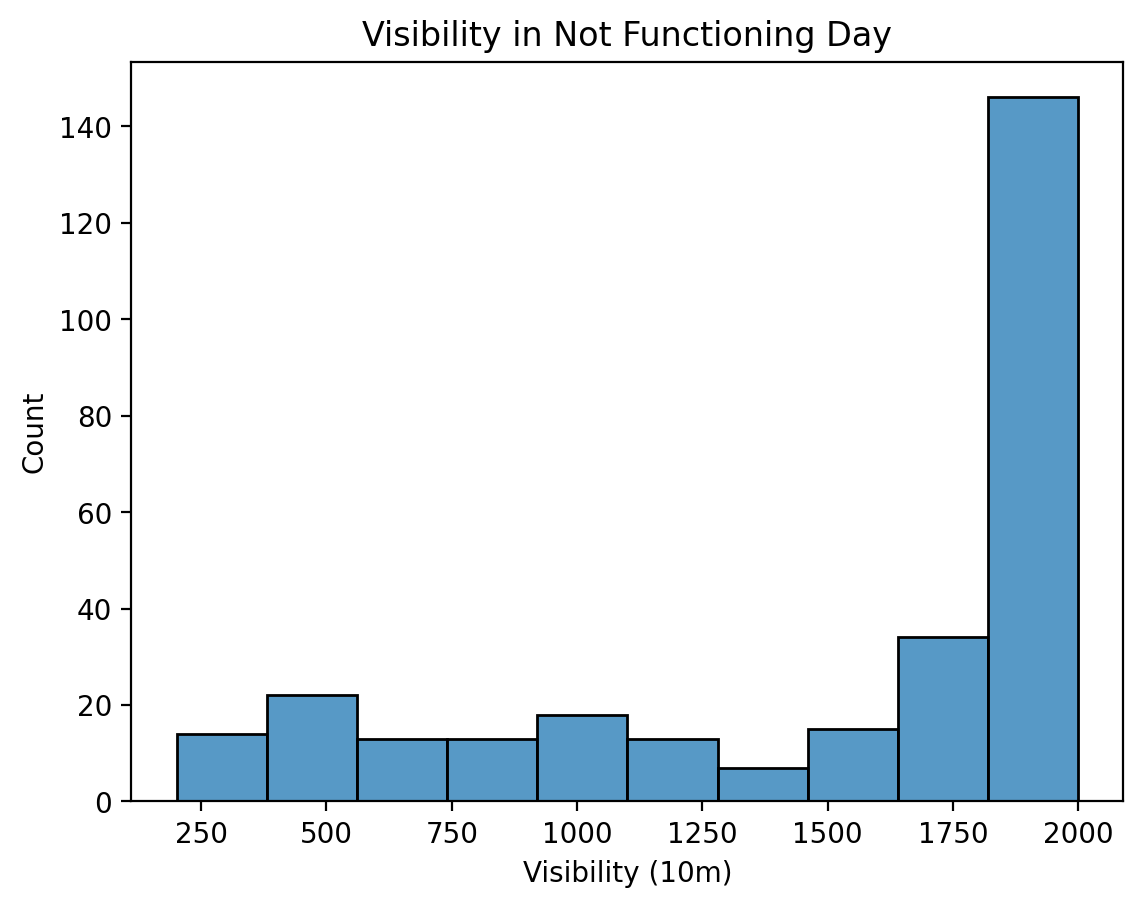

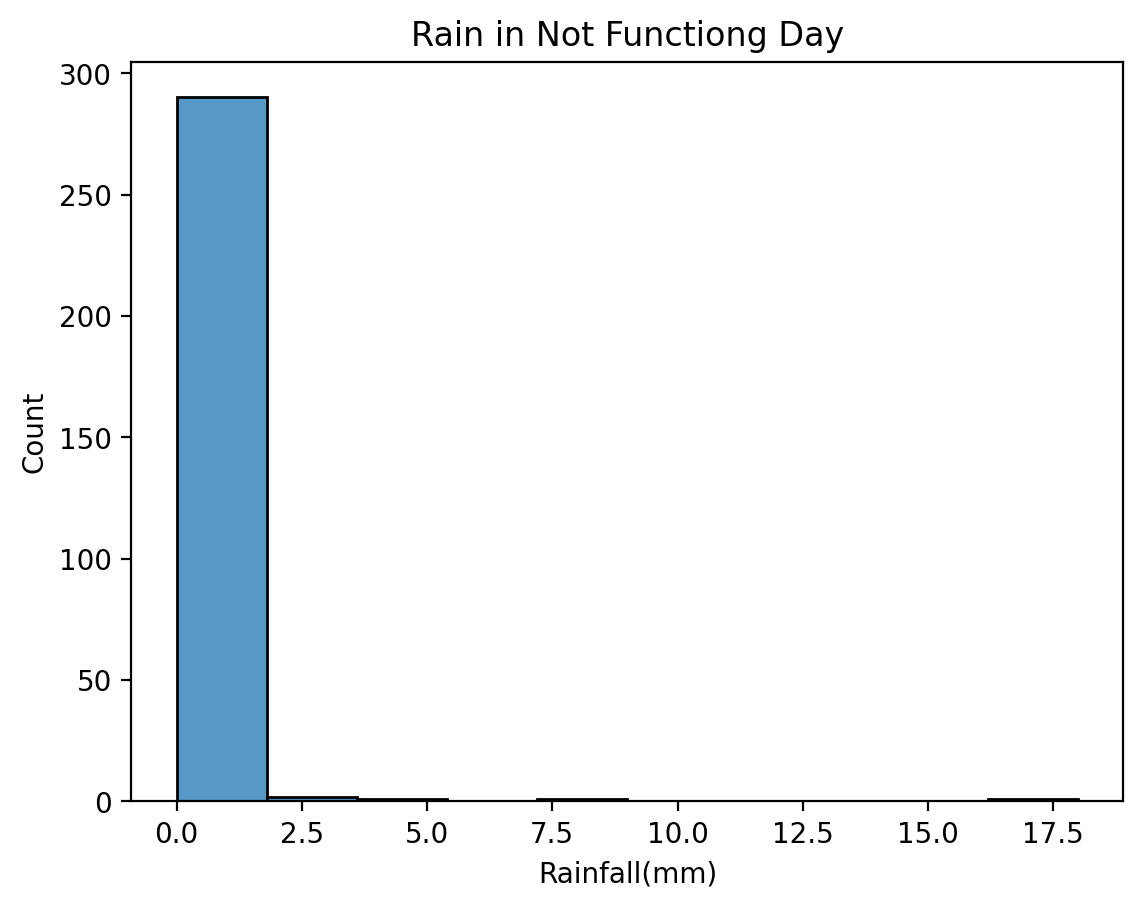

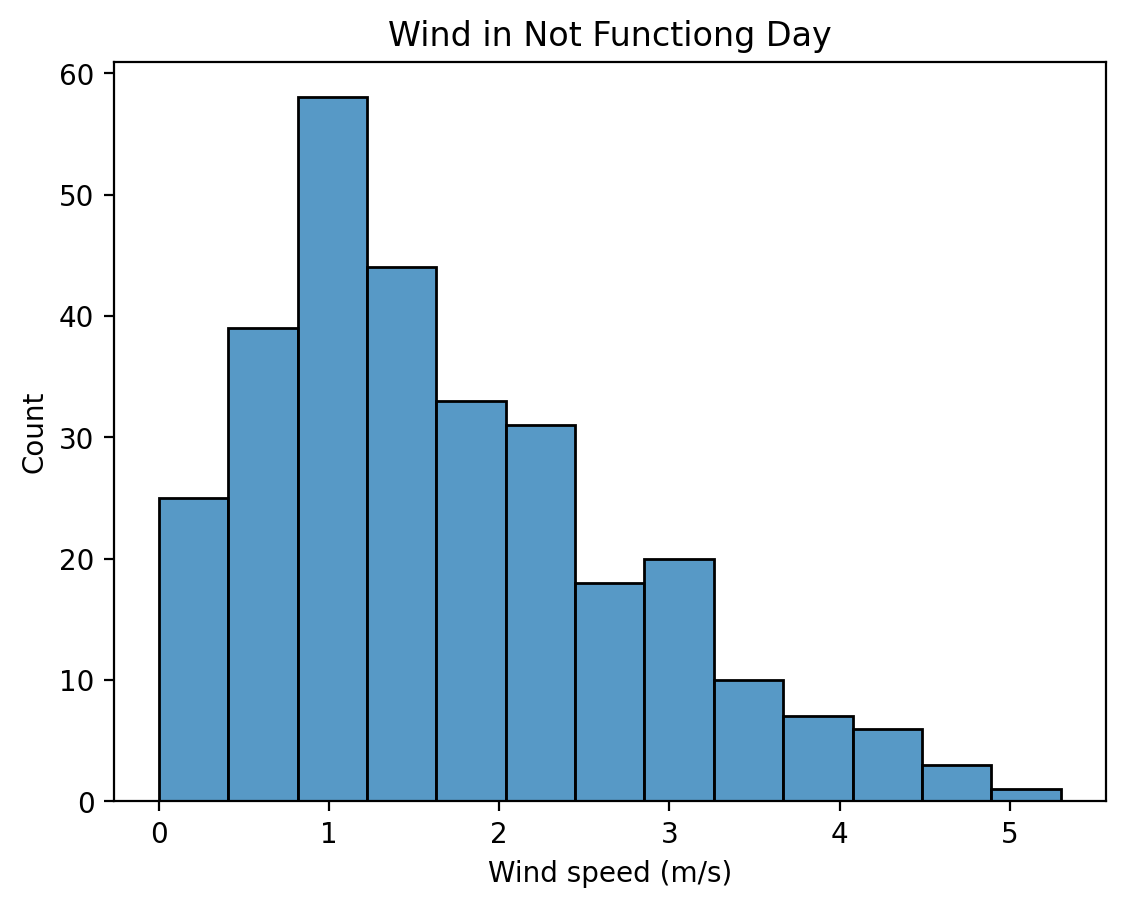

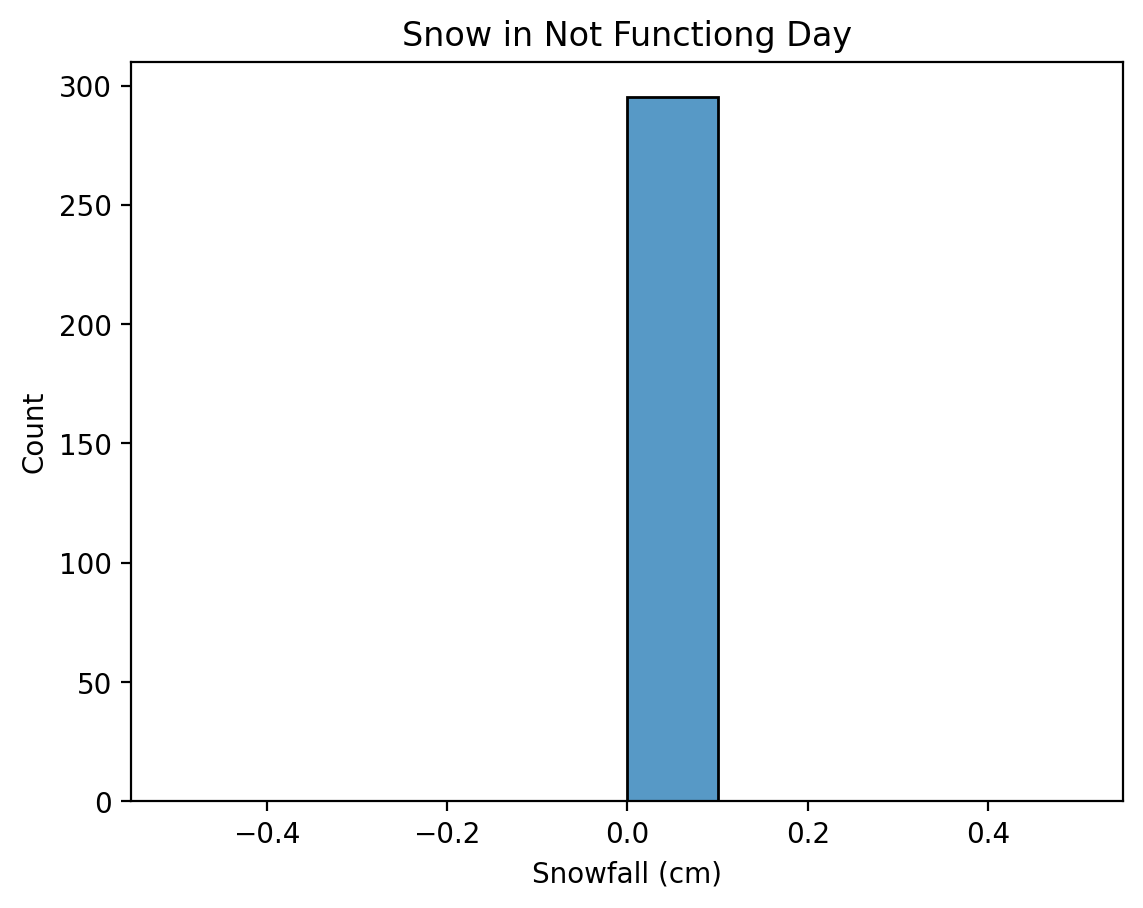

In [406]:
#가시성 확인해보기 
sns.histplot(df3['Visibility (10m)'])
plt.title('Visibility in Not Functioning Day')
plt.show()

# 강우량 확인해보기 
sns.histplot(df3['Rainfall(mm)'])
plt.title('Rain in Not Functiong Day')
plt.show()

# 풍속 확인해보기 
sns.histplot(df3['Wind speed (m/s)'])
plt.title('Wind in Not Functiong Day')
plt.show()

#강설량 확인해보기 
sns.histplot(df3['Snowfall (cm)'],bins=10)
plt.title('Snow in Not Functiong Day')
plt.show()

#### 기상상황으로 인한 운행정지가 아니거나 혹은 강우량과 강설량에 결측치가 있다고 추정됨 

In [375]:
#운영하는 날에만 따로 데이터 프레임 만들기 
df4=df2[df2['Functioning Day']=='Yes']

## 온도 변수
##### 가설: 온도가 높을 수록 따릉이 대여량은 증가할 것이다 ( 상관계수가 0.54 )

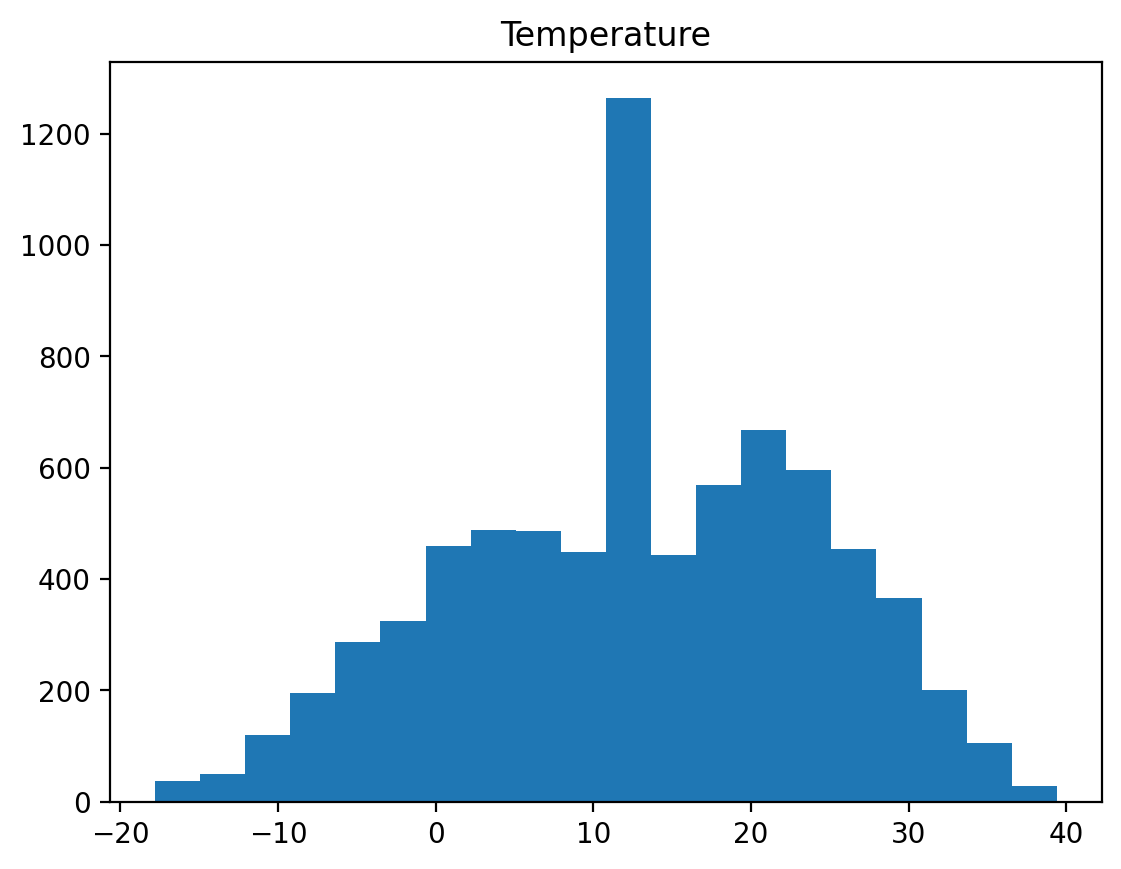

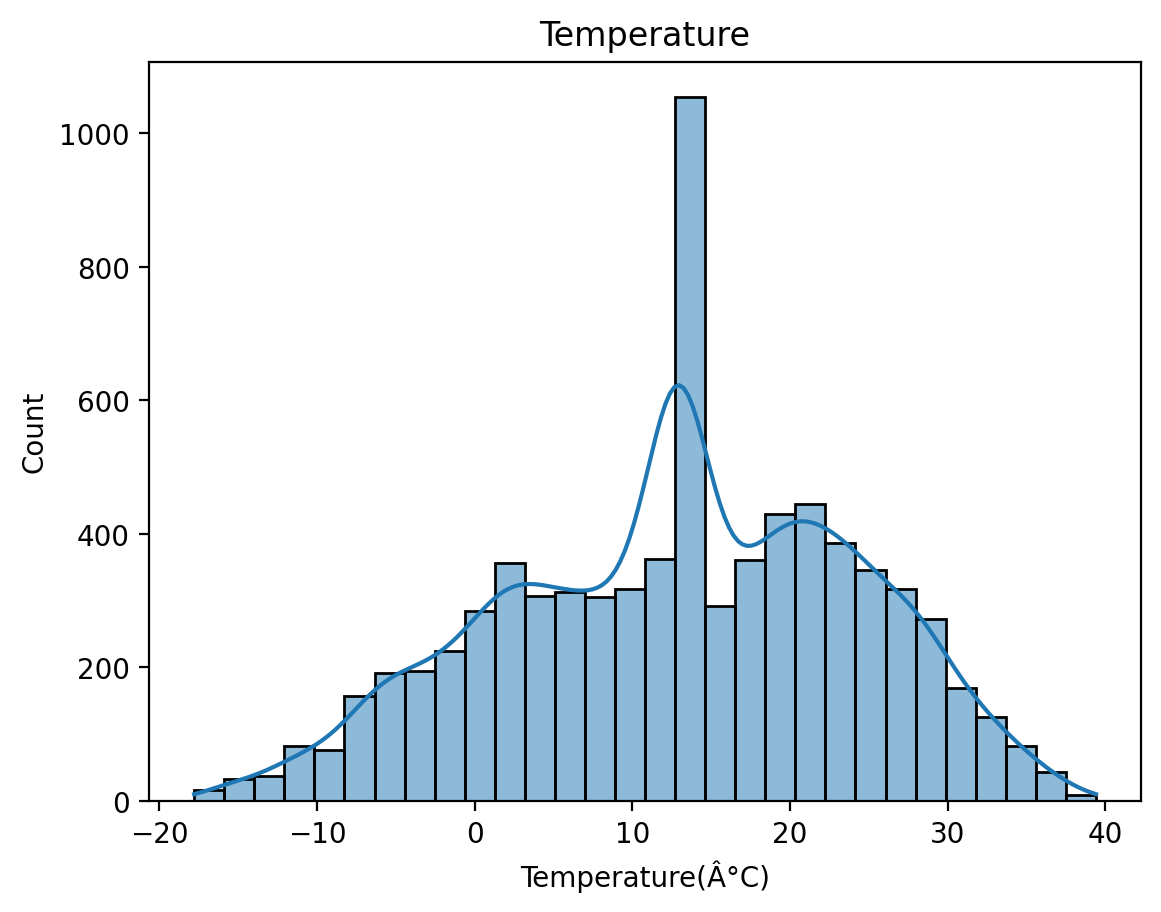

In [231]:
#온도 변수의 히스토그램을 통해서 살펴보기 
plt.hist(df2['Temperature(Â°C)'],bins=20)
plt.title('Temperature')
plt.show()
#
sns.histplot(df2['Temperature(Â°C)'], bins=30 ,kde=True )
plt.title('Temperature')
plt.show()

### 온도가 10-20 사이에 가장 많이 있고 그 아래나 그 위는 개수가 적은 것을 알 수 있다.

Text(0.5, 1.0, 'Temperature in Functioning Day')

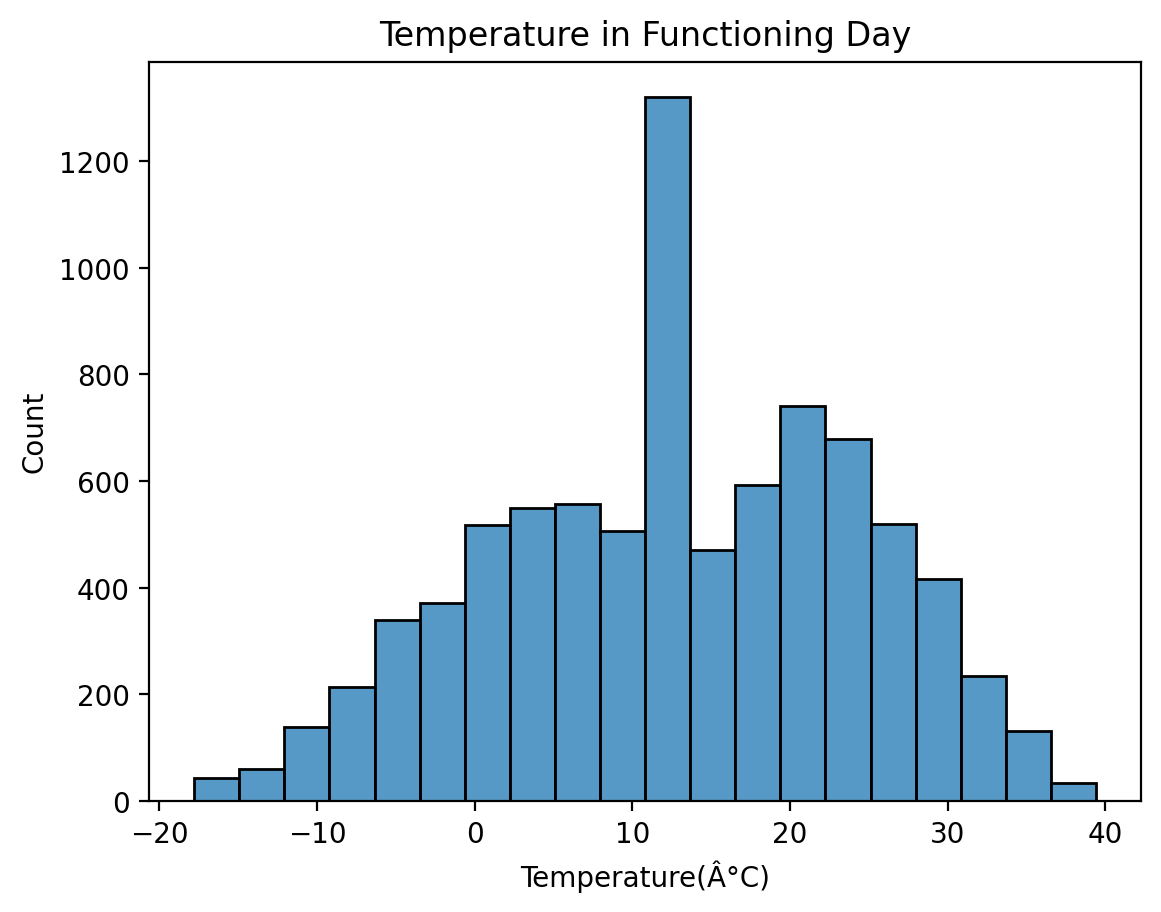

In [378]:
# 따릉이가 운영하는 날에만 확인했을 때도 마찬가지인 것을 알 수 있다 
sns.histplot(df4['Temperature(Â°C)'],bins=20)
plt.title('Temperature in Functioning Day')

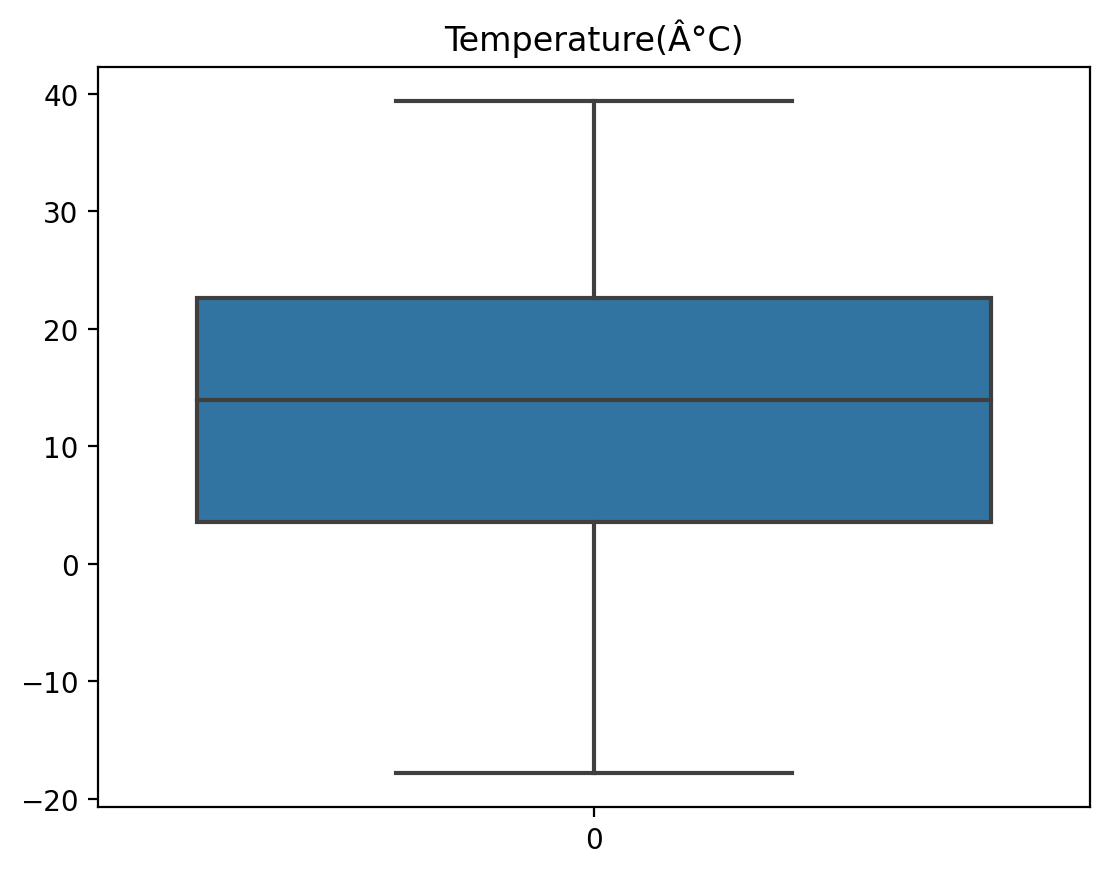

In [235]:
#박스플롯으로 알아보기 
sns.boxplot(df['Temperature(Â°C)'])
plt.title('Temperature(Â°C)')
plt.show()

Good    4811
Hot     2665
Cold    1253
Name: tempcat, dtype: int64


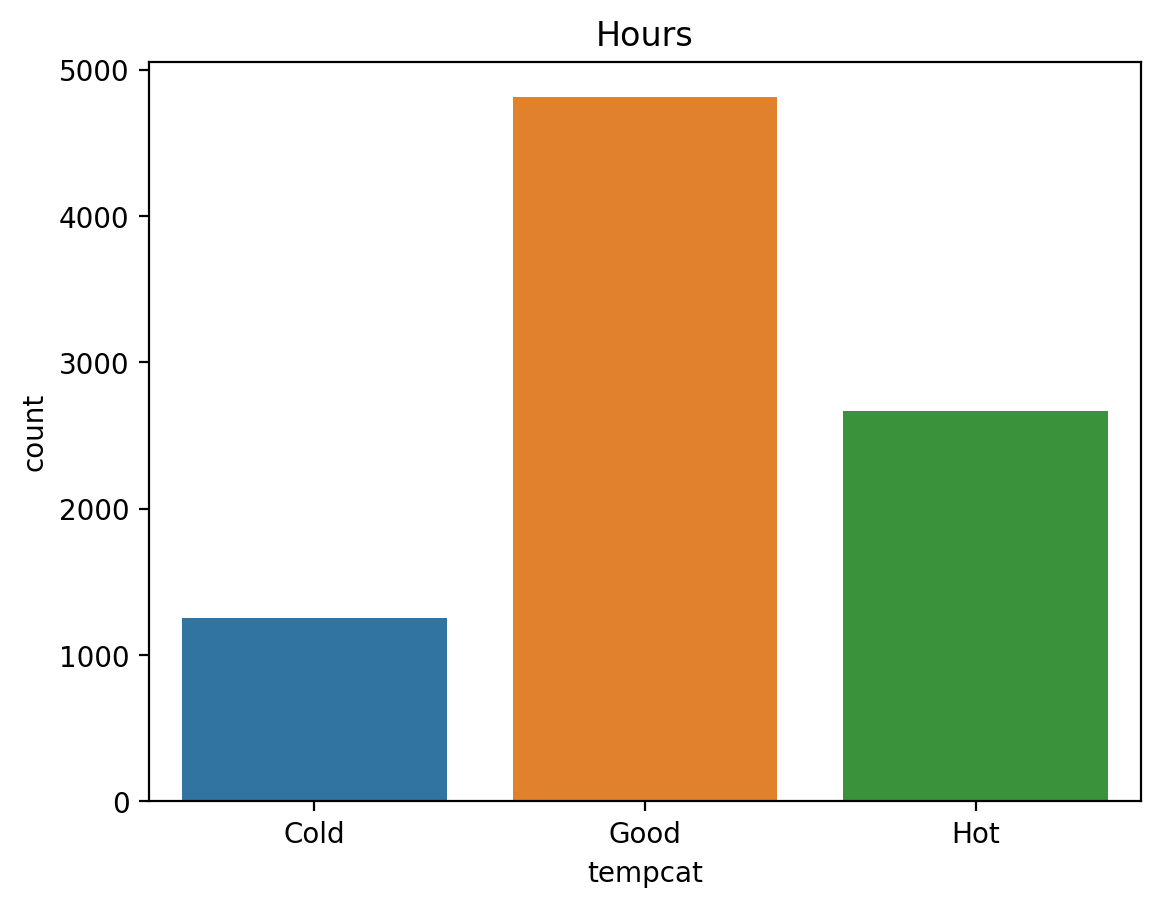

In [382]:
#온도대에 따른 따릉이 대여량의 박스플롯 그리기 

#온도대 나누기 
category=['Cold','Good','Hot'] # 온도대 나눌 카테고리 설정하기 
hourcat=pd.cut(x=df2['Temperature(Â°C)'],bins=[-20,0,20,40],labels=category, right=False) #시간대 나누기 
df2['tempcat']=hourcat #데이터 프레임에 새로운 열 생성하기 

#각 온도대 별 개수 
print(df2['tempcat'].value_counts()) 
sns.countplot(x=df2['tempcat'])
plt.title('Hours')
plt.show()

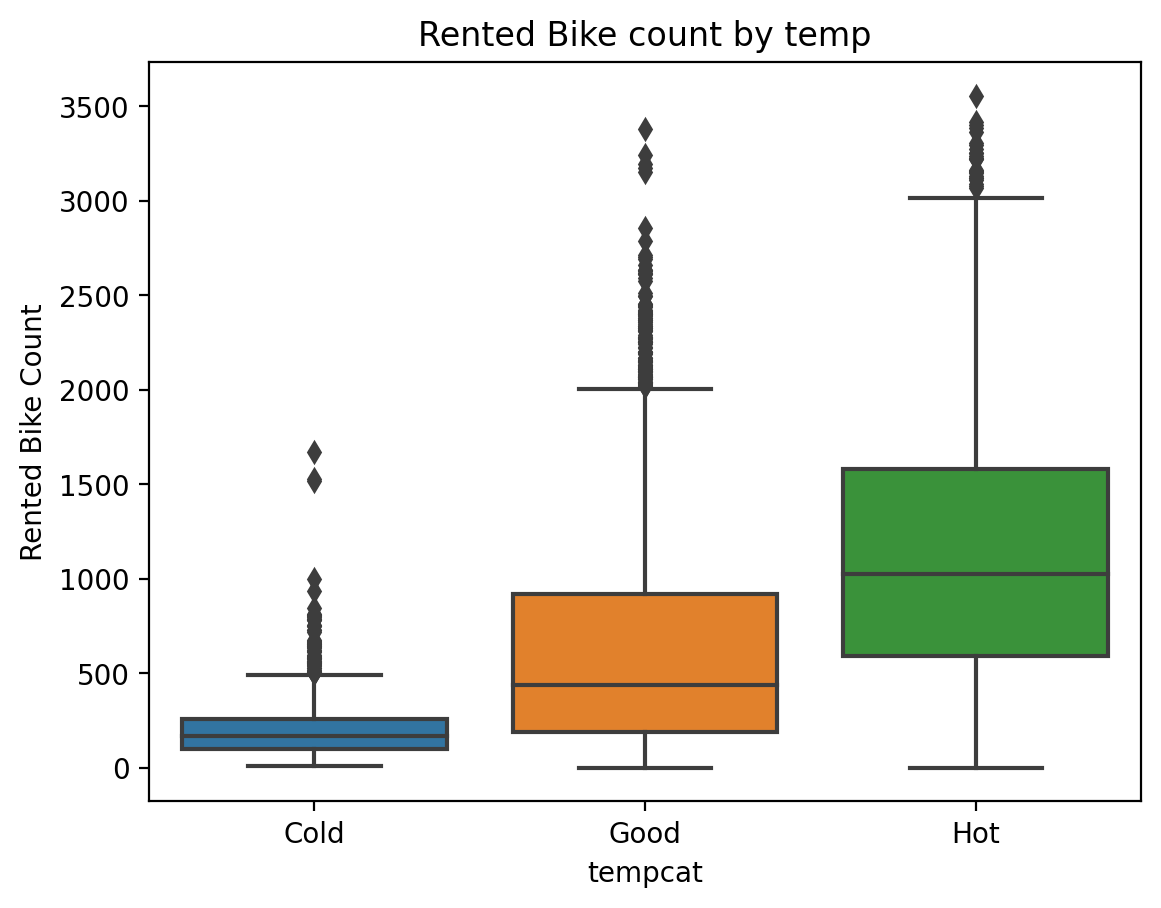

In [384]:
#온도대에 따른 따릉이 대여량 박스플롯 그리기 
sns.boxplot(x=df2['tempcat'], y=df['Rented Bike Count'])
plt.title('Rented Bike count by temp')
plt.show()

### 따릉이 대여량은 추울때 가장 적고 날씨가 더울 때 가장 많은 것을 확인할 수 있다

## 습도 변수
##### 습도 변수와 이슬점 온도 사이의 상관관계

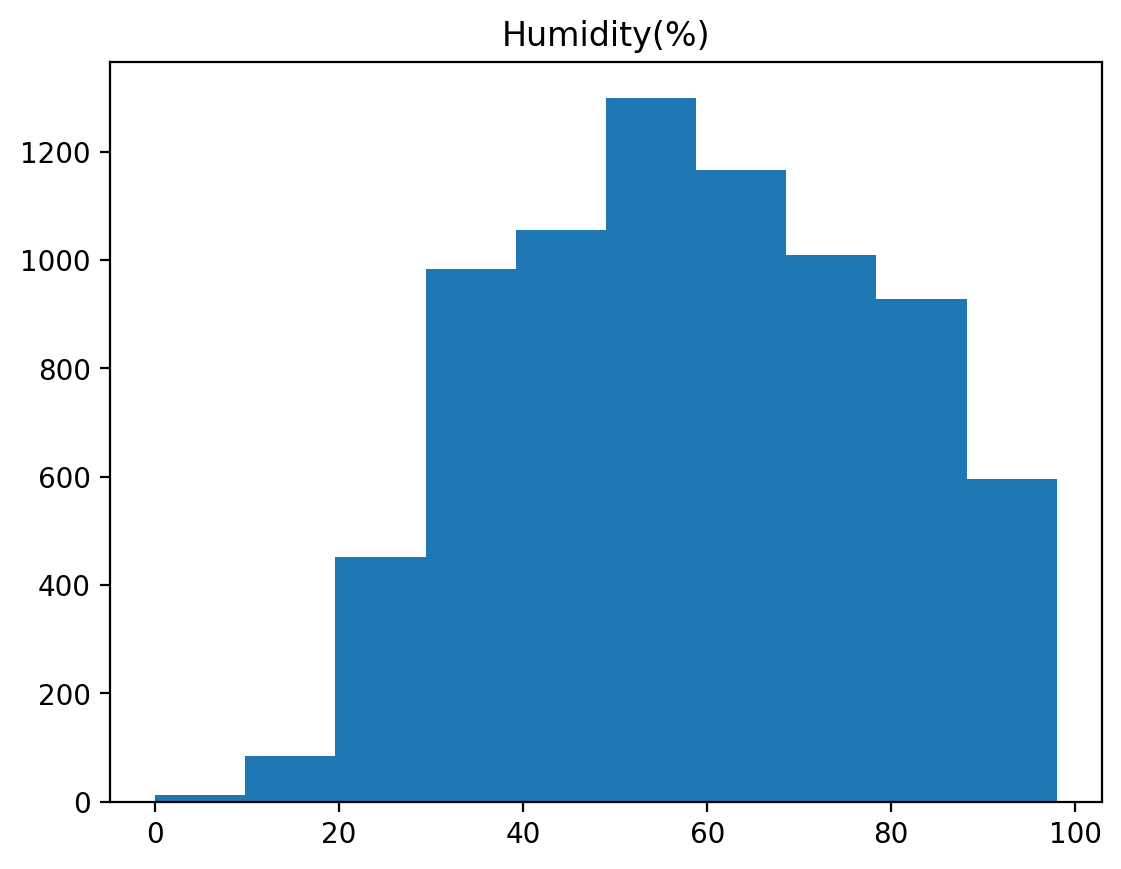

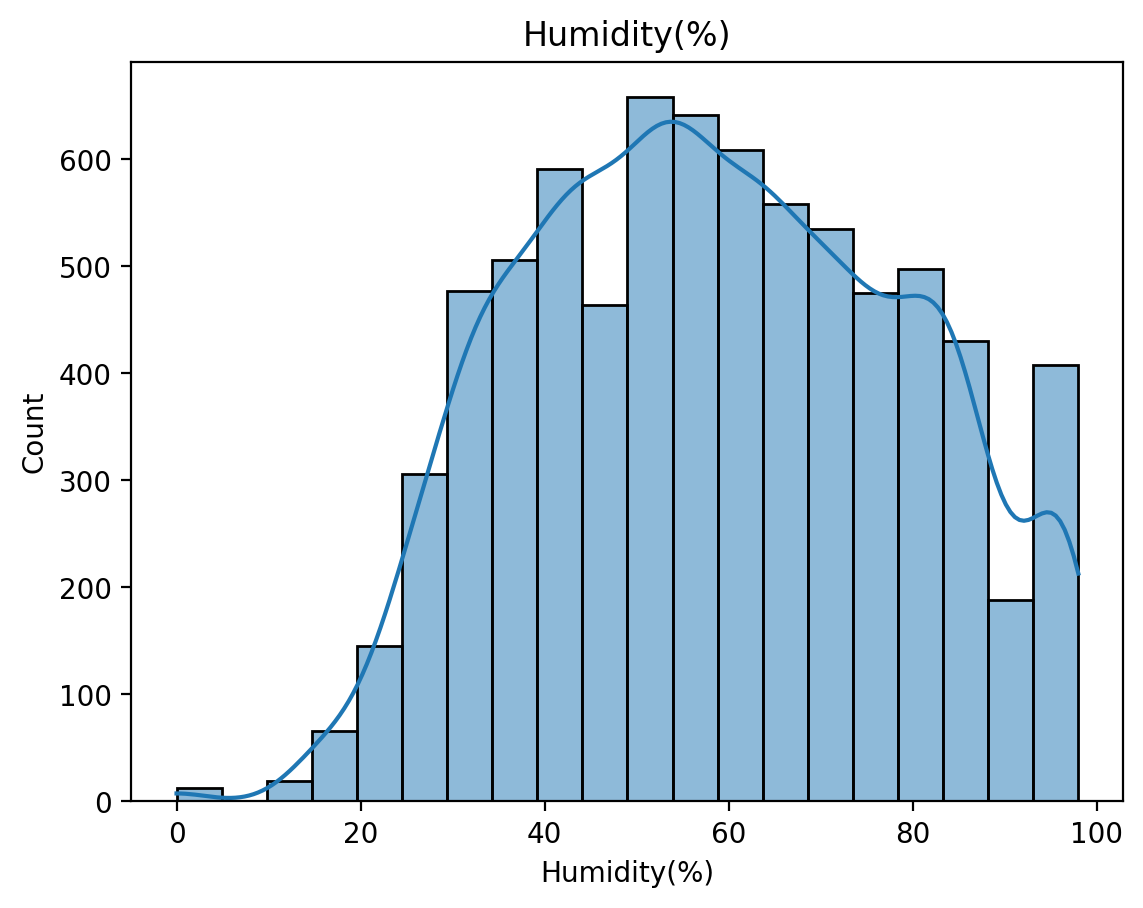

In [236]:
# 습도 변수 히스토그램으로 나타내기 
plt.hist(df2['Humidity(%)'])
plt.title('Humidity(%)')
plt.show()

sns.histplot(df2['Humidity(%)'], kde=True , bins=20)
plt.title('Humidity(%)')
plt.show()

Text(0.5, 1.0, 'Humidity(%)')

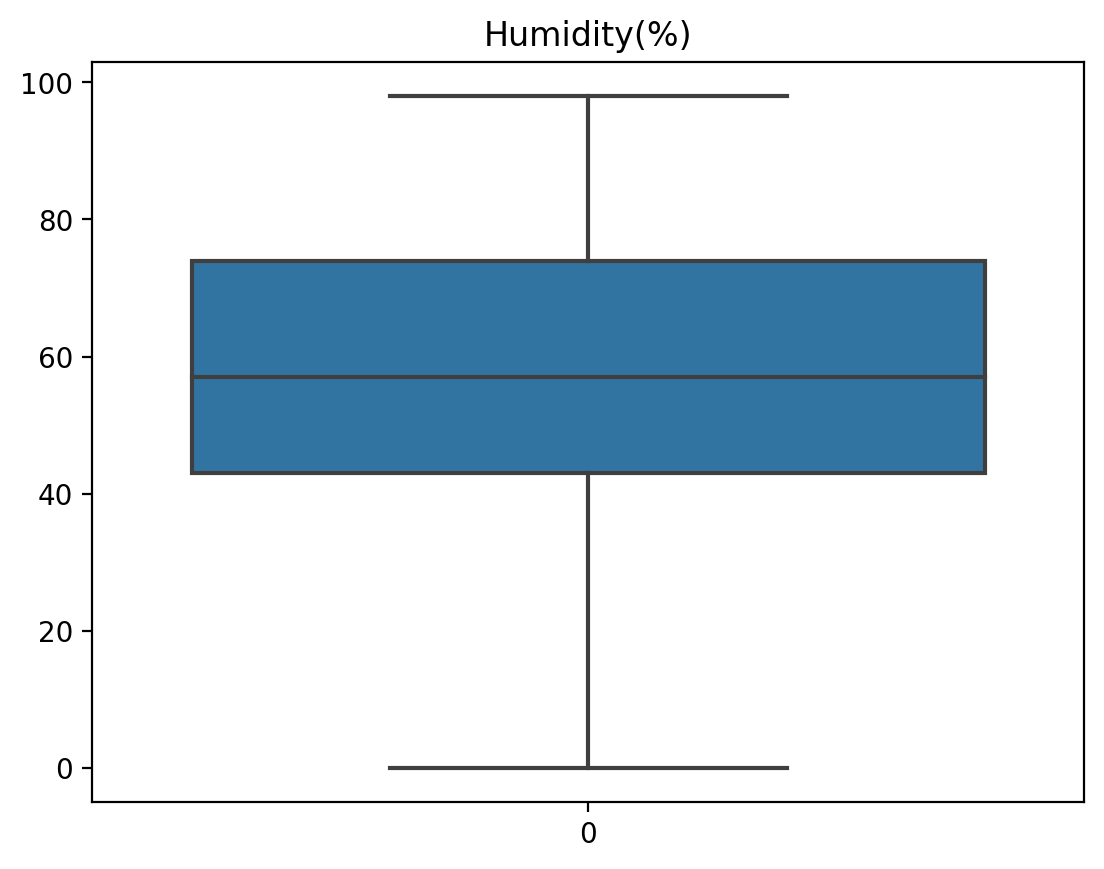

In [312]:
#습도변수를 박스플롯으로 나타내보기 
sns.boxplot(df2['Humidity(%)'])
plt.title('Humidity(%)')

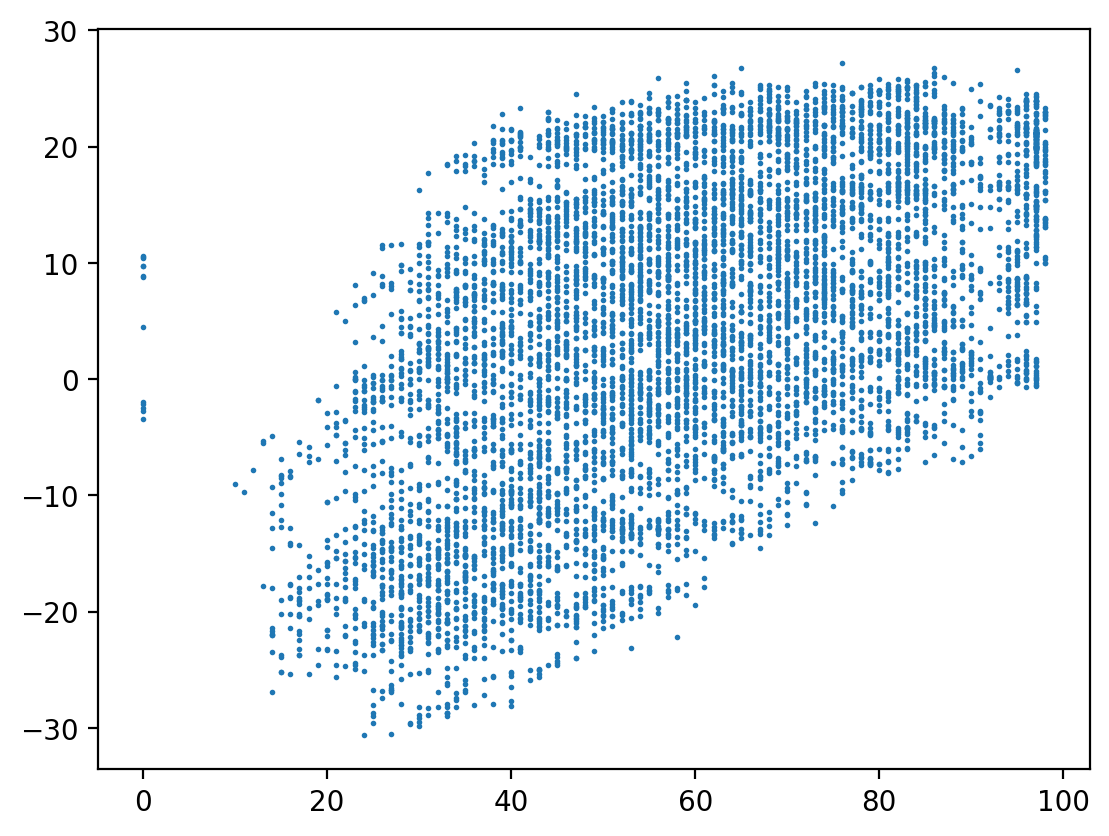

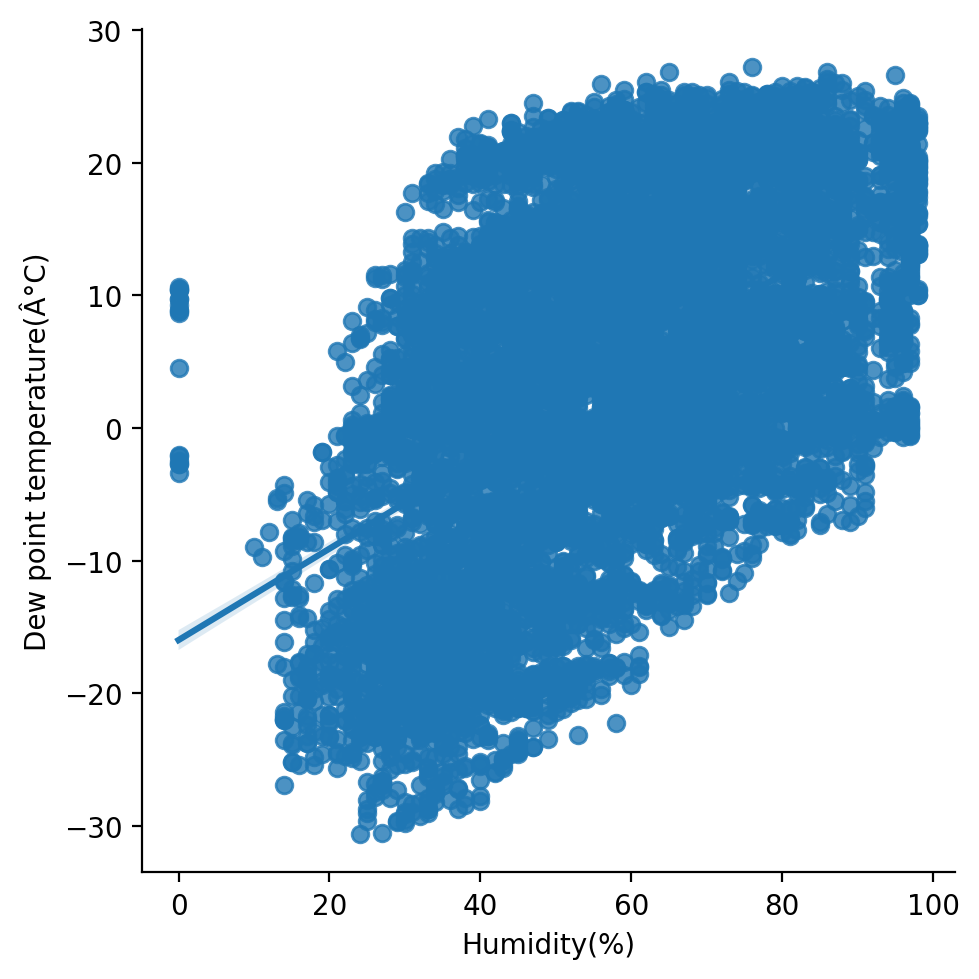

In [239]:
#습도변수와 이슬점 온도와의 상관관계가 0.54 이므로 양의 상관관계가 있을 것으로 추정됨

# 습도변수와 이슬점 온도와의 상관관계 구해보기 - 산점도 그리기 
plt.scatter(df2['Humidity(%)'],df2['Dew point temperature(Â°C)'],s=1)
plt.show()

# 회귀직선 그려보기 
sns.lmplot(x='Humidity(%)',y='Dew point temperature(Â°C)',data=df)
plt.show()

## 가시성 변수

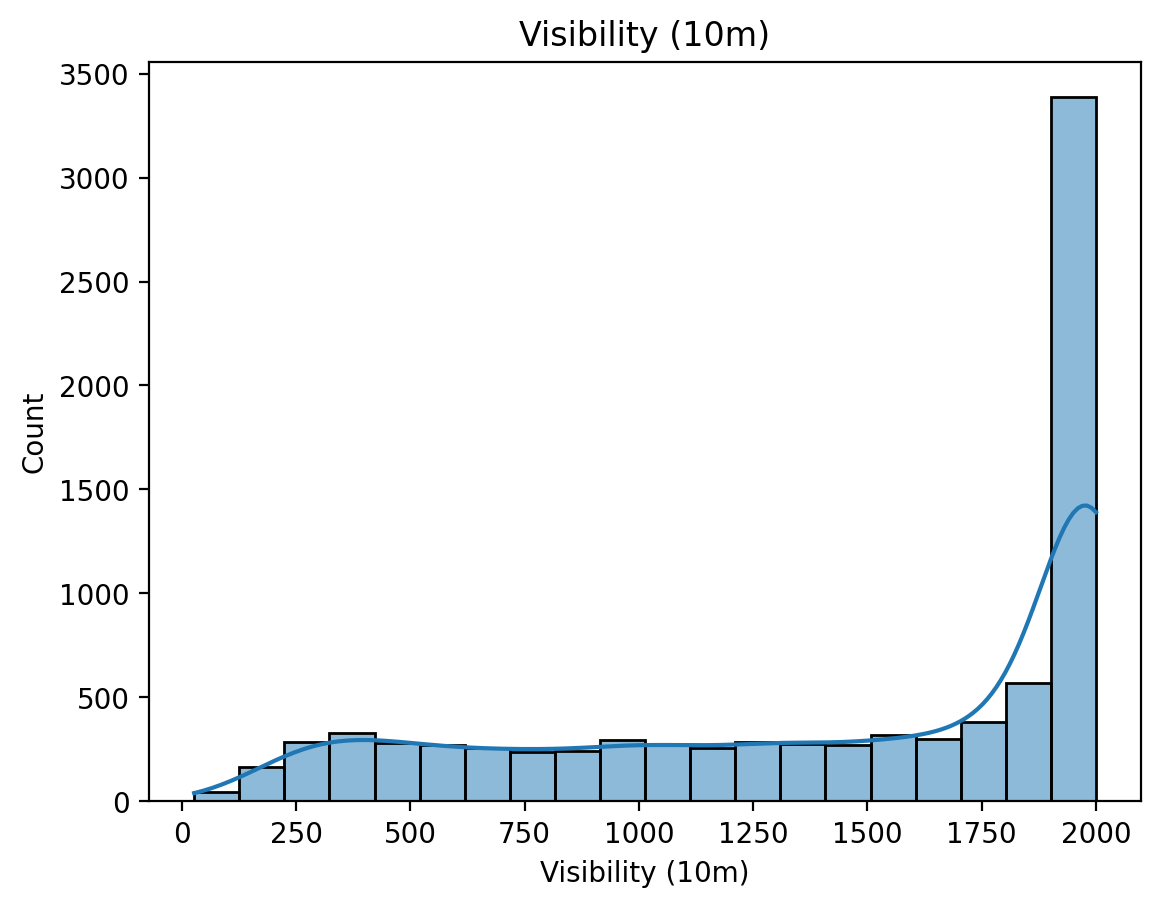

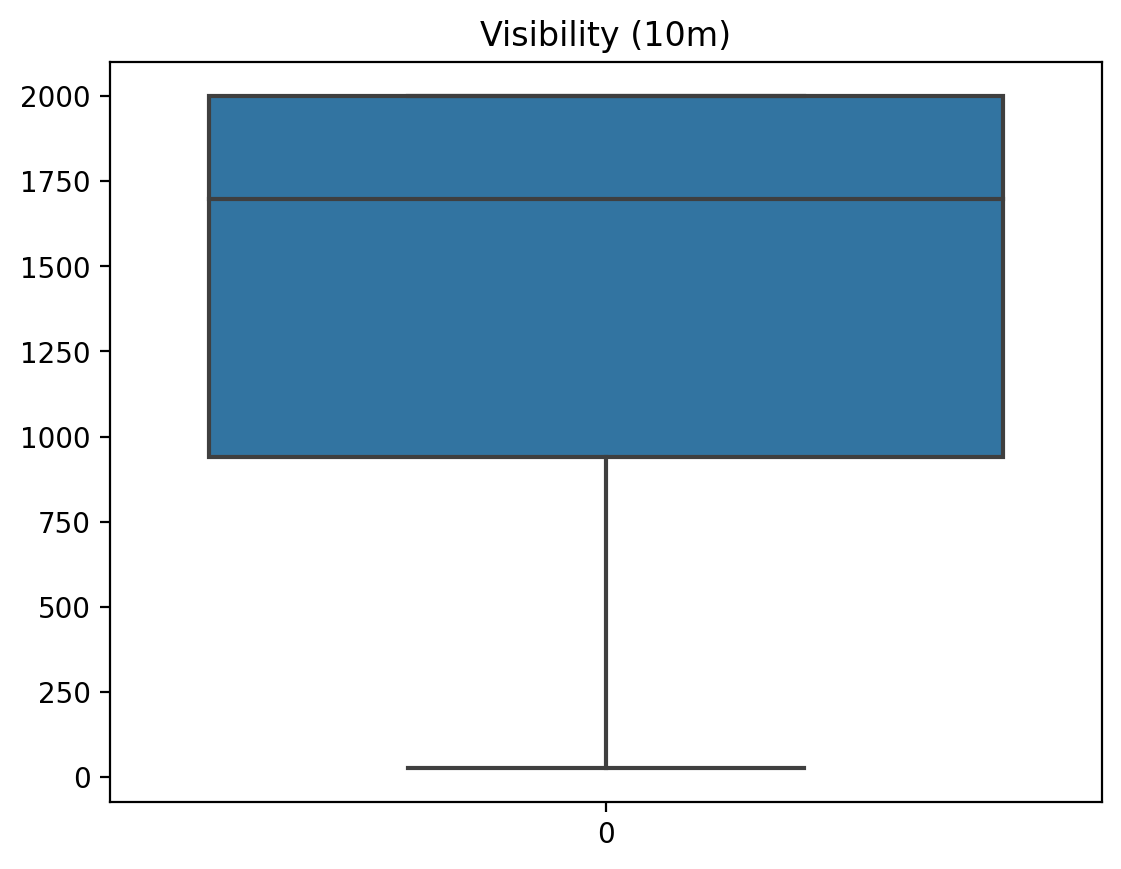

In [313]:
#가시성 변수-히스토그램 
sns.histplot(df2['Visibility (10m)'],kde=True)
plt.title('Visibility (10m)')
plt.show()

#가시성 변수- 박스플롯
sns.boxplot(df2['Visibility (10m)'])
plt.title('Visibility (10m)')
plt.show()


#### 2000 쯤에 치우쳐져있는 것을 알 수 있다.

## 풍속 변수 
##### 0-7 m/s 의 풍속일 경우 안전 
##### 7-10 m/s의 풍속일 경우 주의 
##### 10-15 m/s 의 풍속일 경우 경고 ( 다소 강한 바람) 

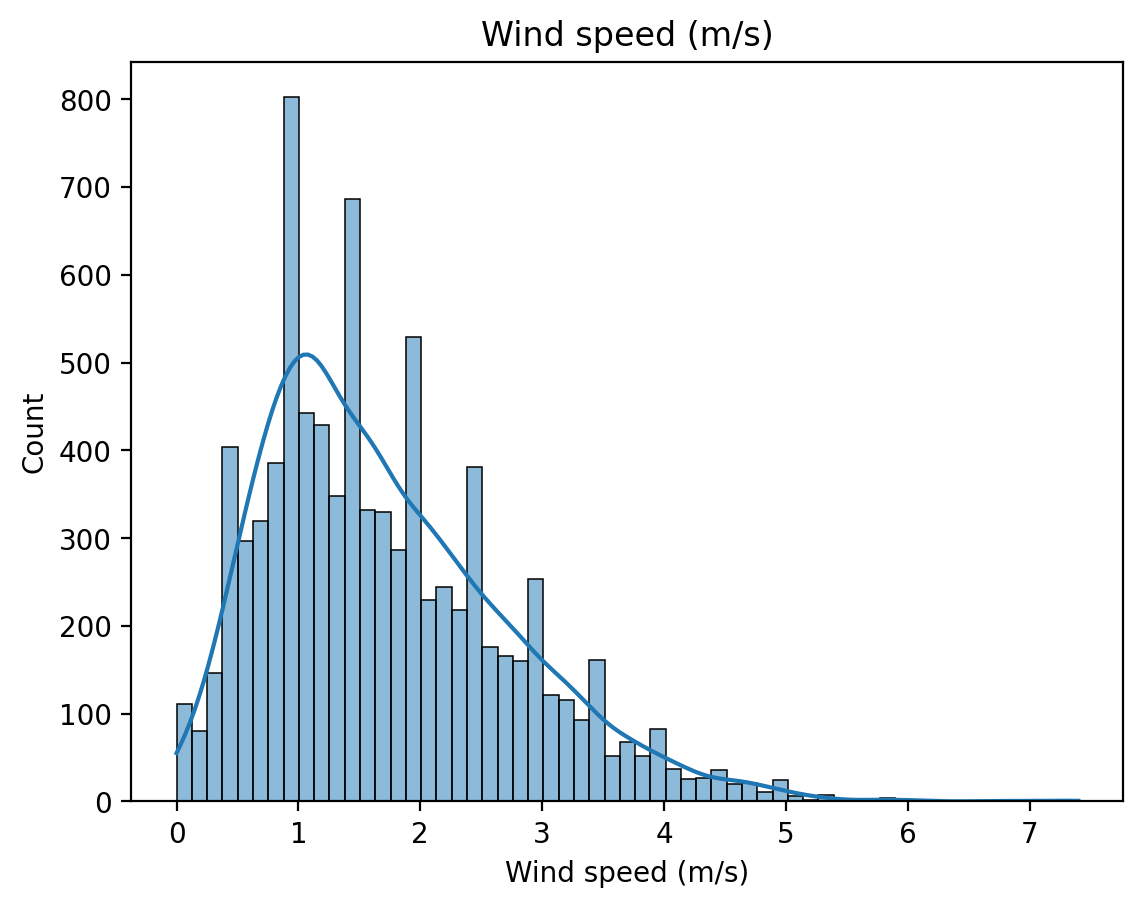

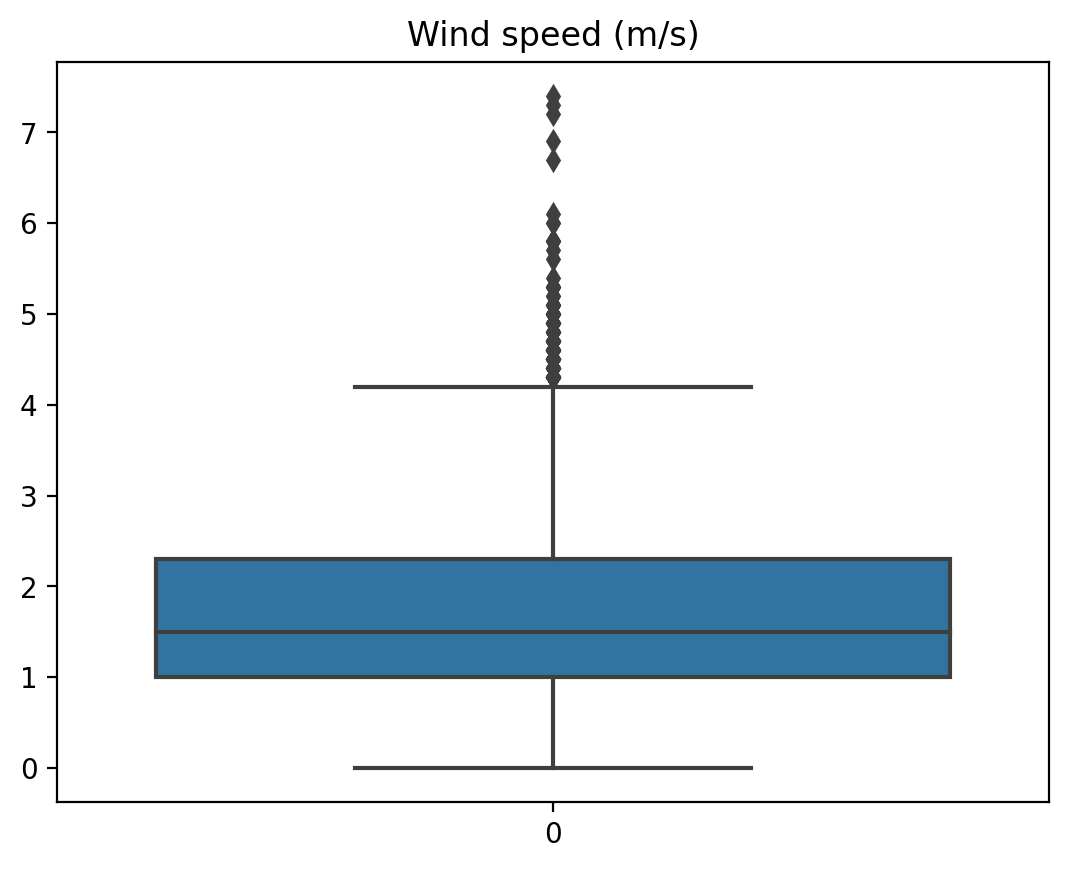

In [419]:
#풍속 변수-히스토그램 
sns.histplot(df2['Wind speed (m/s)'],kde=True)
plt.title('Wind speed (m/s)')
plt.show()

#풍속 변수- 박스플롯
sns.boxplot(df2['Wind speed (m/s)'])
plt.title('Wind speed (m/s)')
plt.show()

#### 풍속 변수의 경우 10m/s 가 넘는 경우가 없으므로 해당 기간 동안 강한 바람이 불었던 적은 없다고 볼 수 있다

## 태양복사에너지 변수 

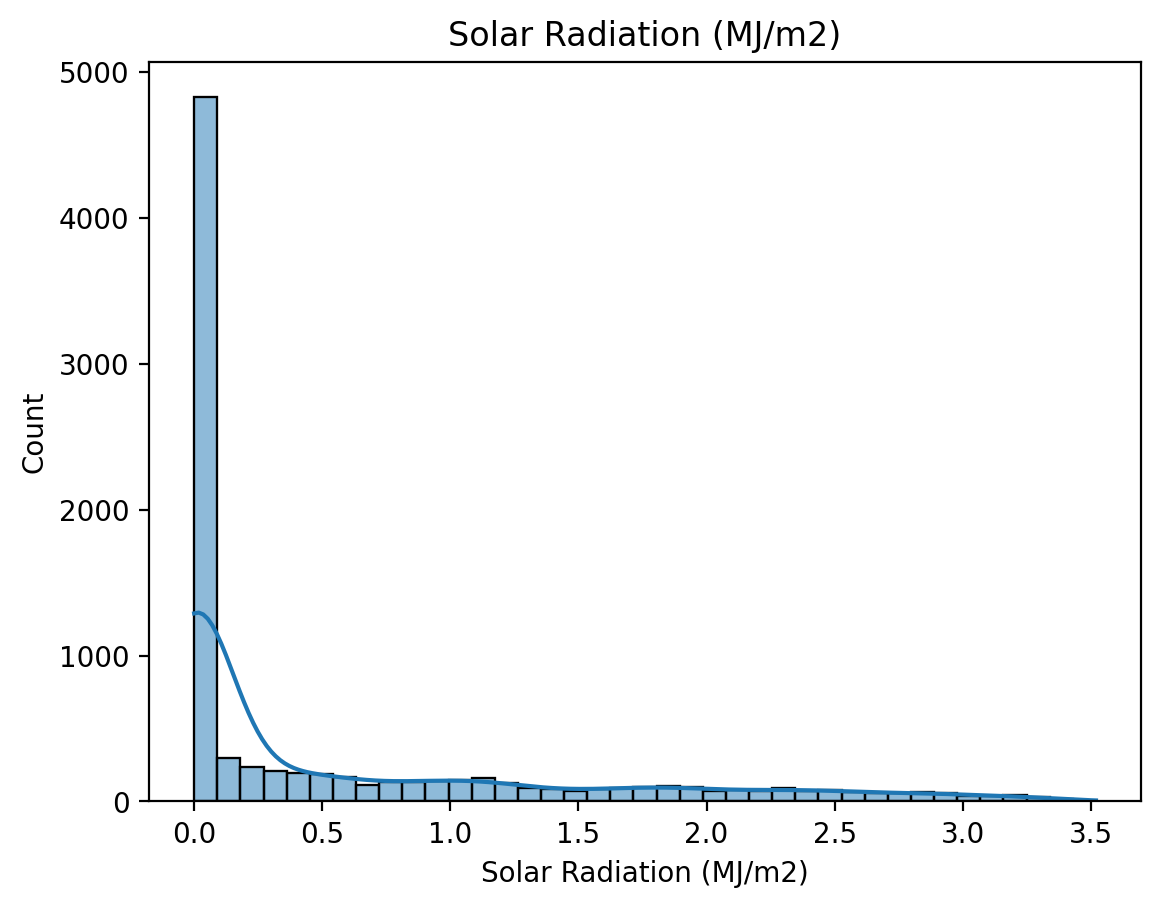

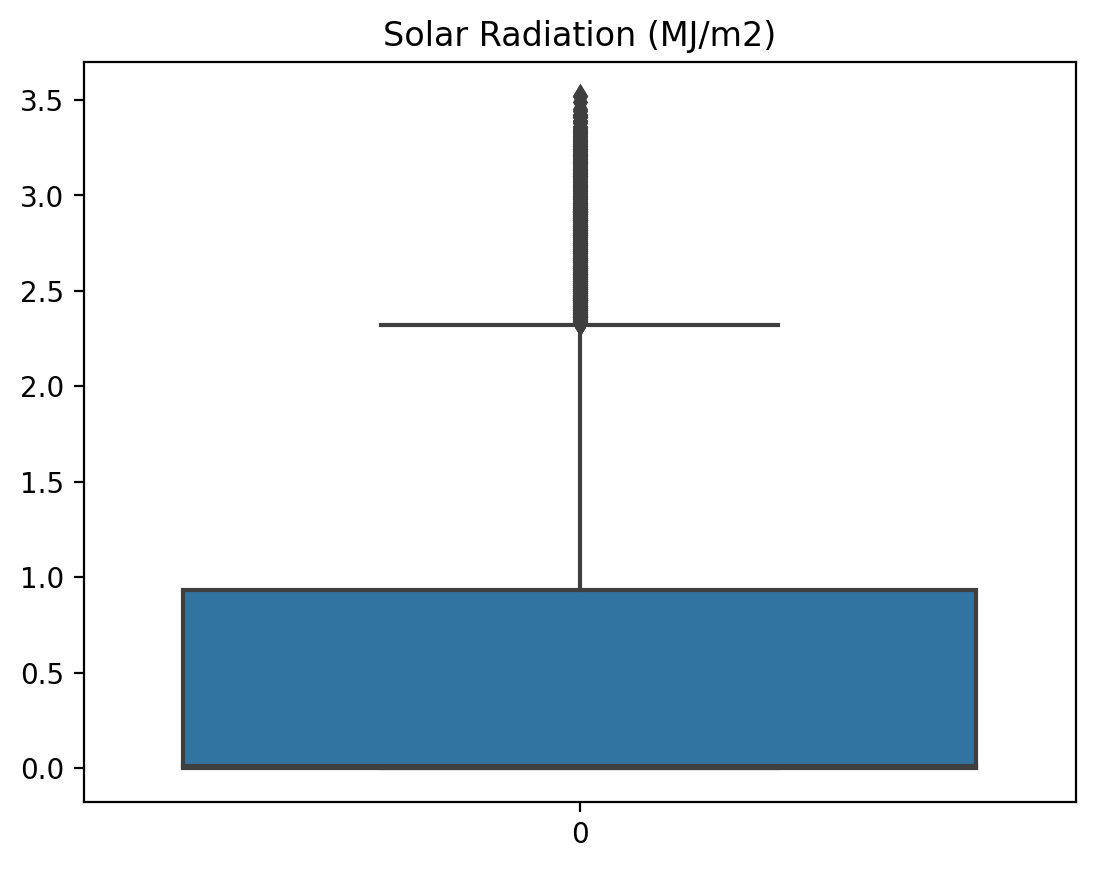

In [420]:
#태양복사에너지-히스토그램 
sns.histplot(df2['Solar Radiation (MJ/m2)'],kde=True)
plt.title('Solar Radiation (MJ/m2)')
plt.show()

#태양복사에너지- 박스플롯
sns.boxplot(df2['Solar Radiation (MJ/m2)'])
plt.title('Solar Radiation (MJ/m2)')
plt.show()

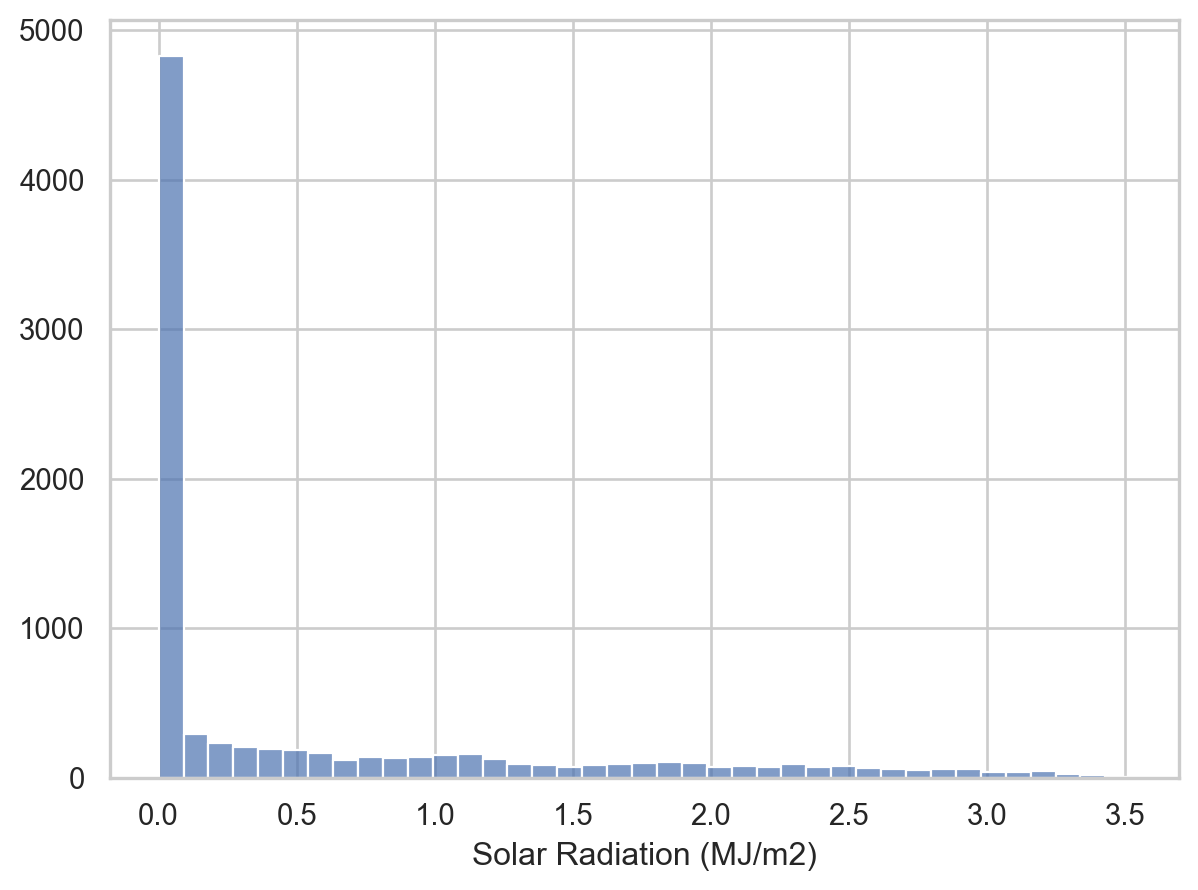

In [421]:
(
    so.Plot(df2, x='Solar Radiation (MJ/m2)')
    .add(so.Bars(), so.Hist())
    .theme({**sns.axes_style("whitegrid")})
)

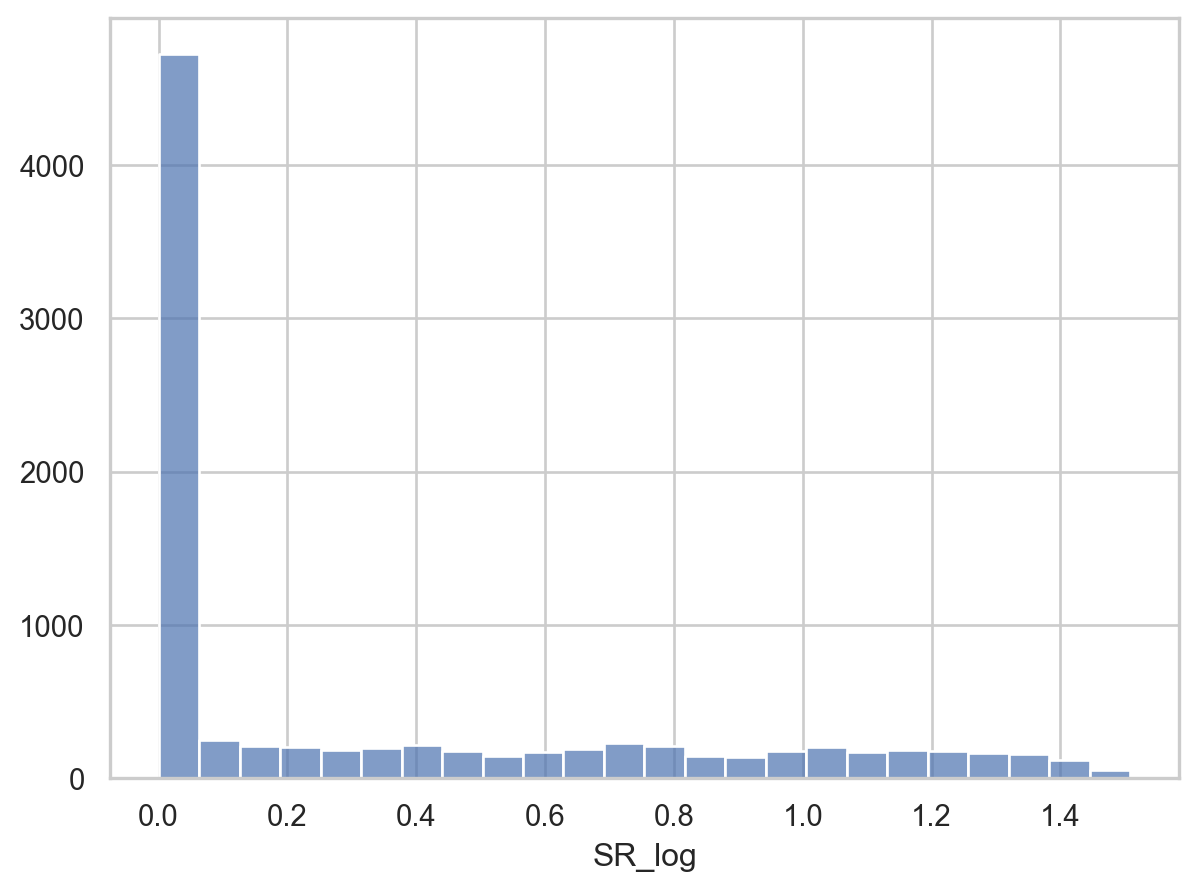

In [323]:
df2['SR_log']=np.log(df2['Solar Radiation (MJ/m2)']+1)
(
    so.Plot(df2, x='SR_log')
    .add(so.Bars(), so.Hist())
    .theme({**sns.axes_style("whitegrid")})
)

#### 태양복사 에너지가 0일 수는 없으므로 결측값이 0으로 처리되었을 것이라고 예측 가능

## 강우량 변수 

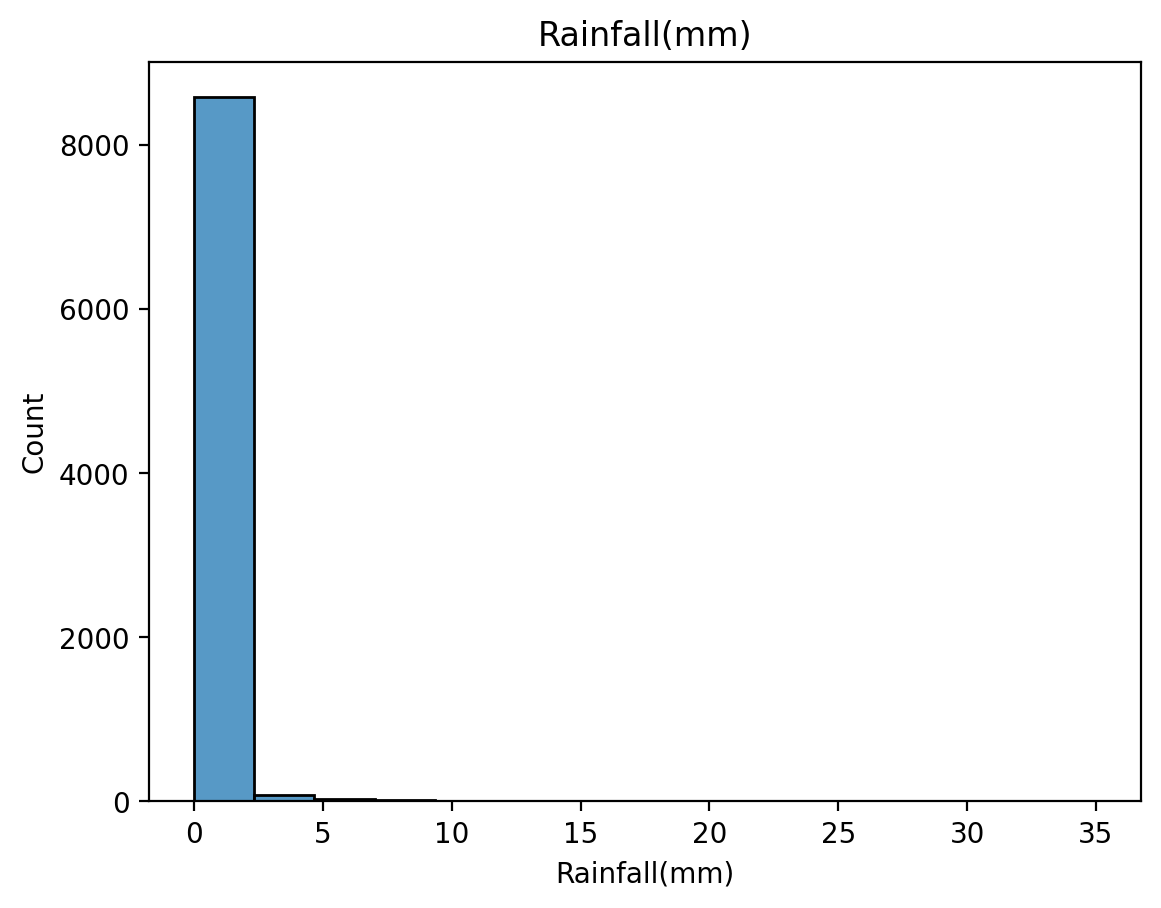

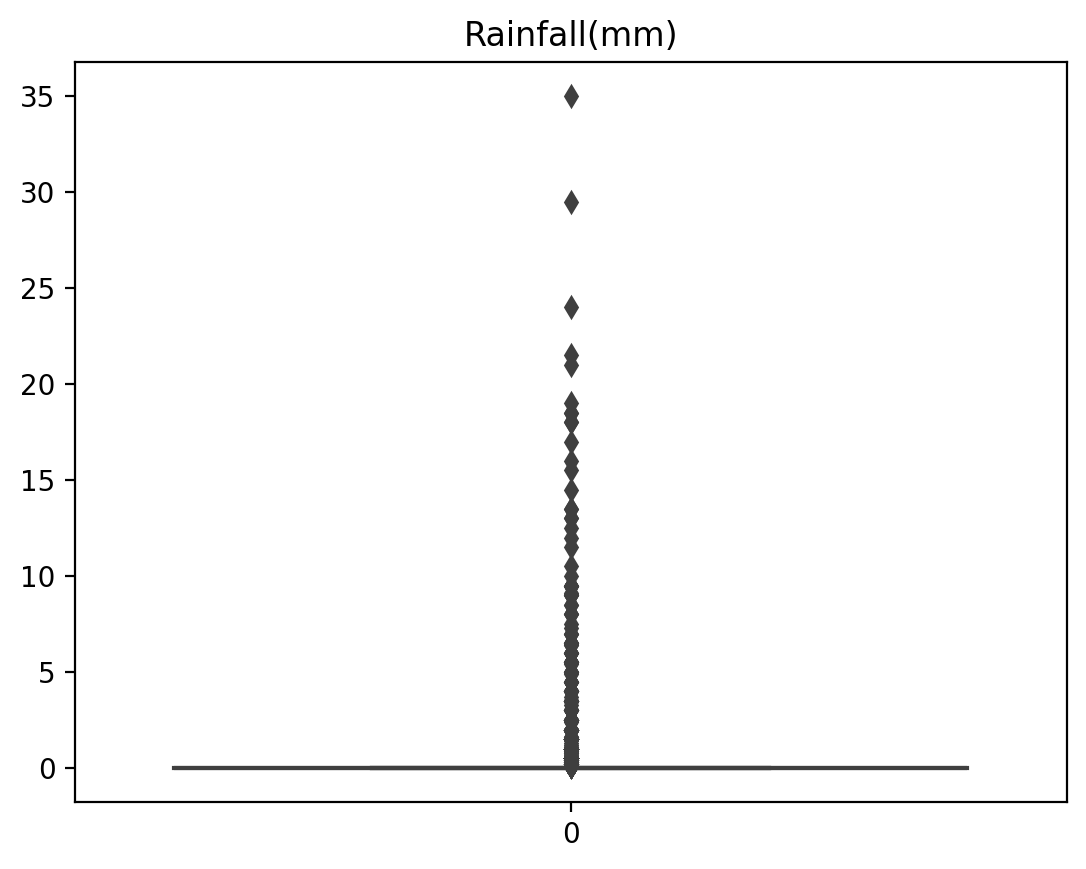

In [422]:
#강우량 변수-히스토그램 
sns.histplot(df2['Rainfall(mm)'])
plt.title('Rainfall(mm)')
plt.show()

#강우량 변수- 박스플롯
sns.boxplot(df2['Rainfall(mm)'])
plt.title('Rainfall(mm)')
plt.show()

#### 이 경우 0 값이 대체적이고 나머지 값들이 존재한다 35mm 는 말이 안되는 값이 아니므로 가능한 값이다 따라서 이상치 처리를 하지 않는다 

In [332]:
df2[df2['Rainfall(mm)']>0]

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,SR_log
51,51,2017-12-03,117,3,3.4,71,1.6,1011,-1.3,0.00,0.5,0.0,Winter,No Holiday,Yes,0.000000
54,54,2017-12-03,13,6,3.4,86,2.5,278,1.2,0.00,1.0,0.0,Winter,No Holiday,Yes,0.000000
57,57,2017-12-03,152,9,3.5,91,1.8,231,2.1,0.02,2.5,0.0,Spring,No Holiday,Yes,0.019803
78,78,2017-12-04,200,6,1.2,76,3.7,371,-2.5,0.00,0.1,0.0,Winter,No Holiday,Yes,0.000000
120,120,2017-12-06,145,0,-2.8,77,0.0,331,-6.2,0.00,0.1,0.1,Winter,No Holiday,Yes,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,8235,2018-11-09,0,3,10.8,82,2.8,1712,7.8,0.00,0.5,0.0,Autumn,No Holiday,No,0.000000
8241,8241,2018-11-09,0,9,10.8,78,2.6,1985,7.1,0.13,0.5,0.0,Autumn,No Holiday,No,0.122218
8520,8520,2018-11-21,119,0,7.2,74,1.2,772,2.8,0.00,0.2,0.0,Autumn,No Holiday,Yes,0.000000
8523,8523,2018-11-21,112,3,6.5,87,1.0,710,4.4,0.00,1.0,0.0,Autumn,No Holiday,Yes,0.000000


In [413]:
len(df2[df2['Rainfall(mm)']>0]['Date'].unique())

102

#### 데이터 수집 기간 동안 비가 조금이라도 온 날은 102일이다

## 강설량 변수

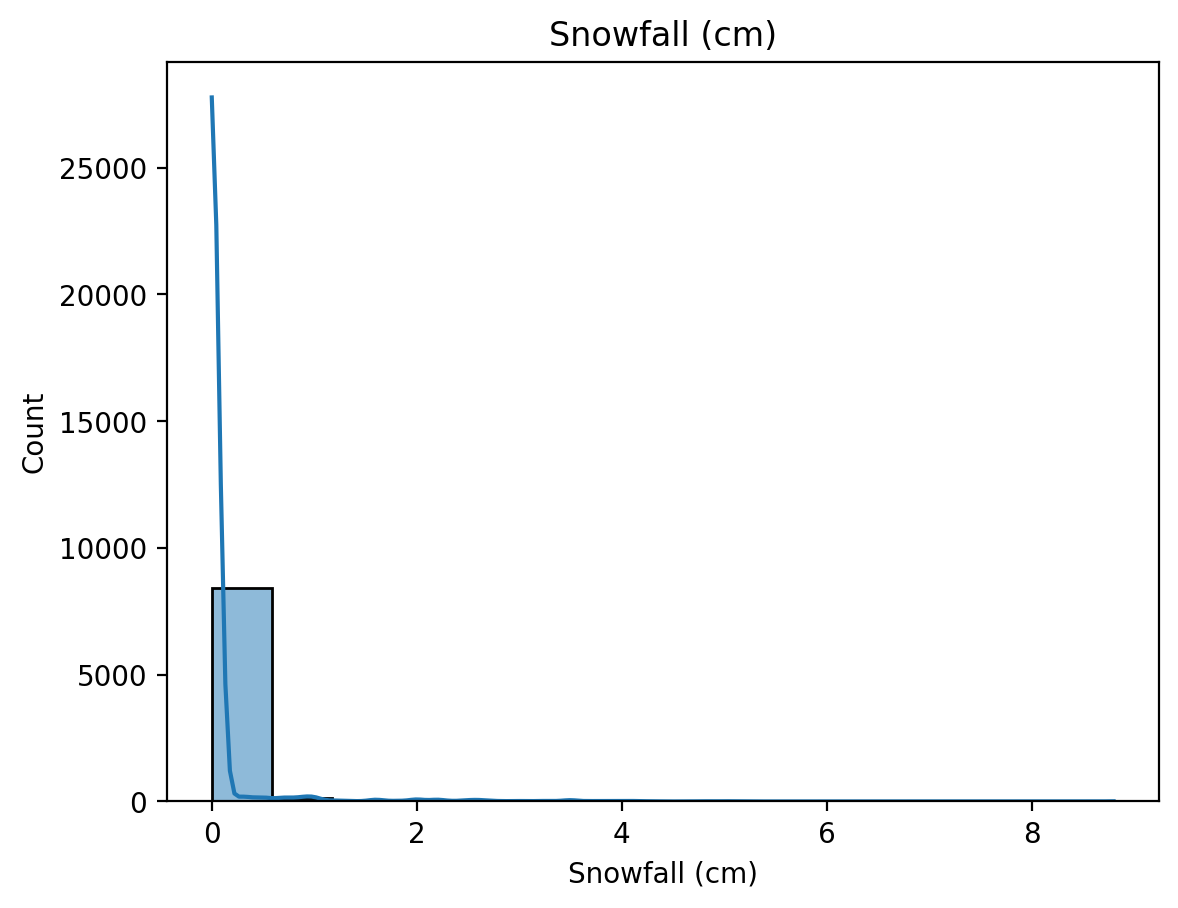

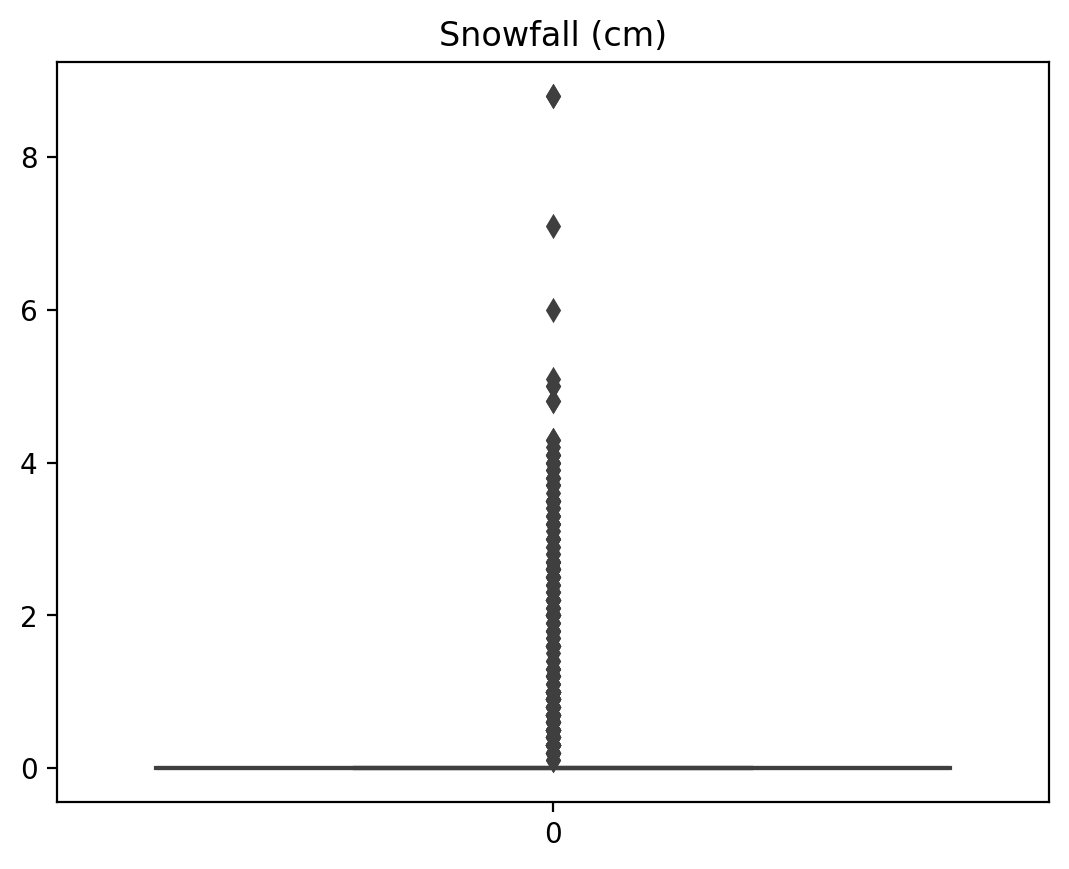

In [423]:
#강설량 변수-히스토그램 
sns.histplot(df2['Snowfall (cm)'],kde=True)
plt.title('Snowfall (cm)')
plt.show()

#강설량 변수- 박스플롯
sns.boxplot(df2['Snowfall (cm)'])
plt.title('Snowfall (cm)')
plt.show()

In [ ]:
df2[df2['Snowfall (cm)']>0]['Seasons'].unique()

#### 봄과 가을 겨울에 눈이 각각 올 수 있으므로 이상치가 존재하지는 않는다 

In [414]:
len(df2[df2['Snowfall (cm)']>0]['Date'].unique())

27

#### 데이터 수집 기간동안 눈이 온 날은 27일이다

## 시간대 변수

시간대 나누기

Morining:6-12

Afternoon:13-18 

Evening:19-23

LateNight:24-5


Morning      2546
LateNight    2184
Afternoon    2181
Evening      1818
Name: hourcat, dtype: int64


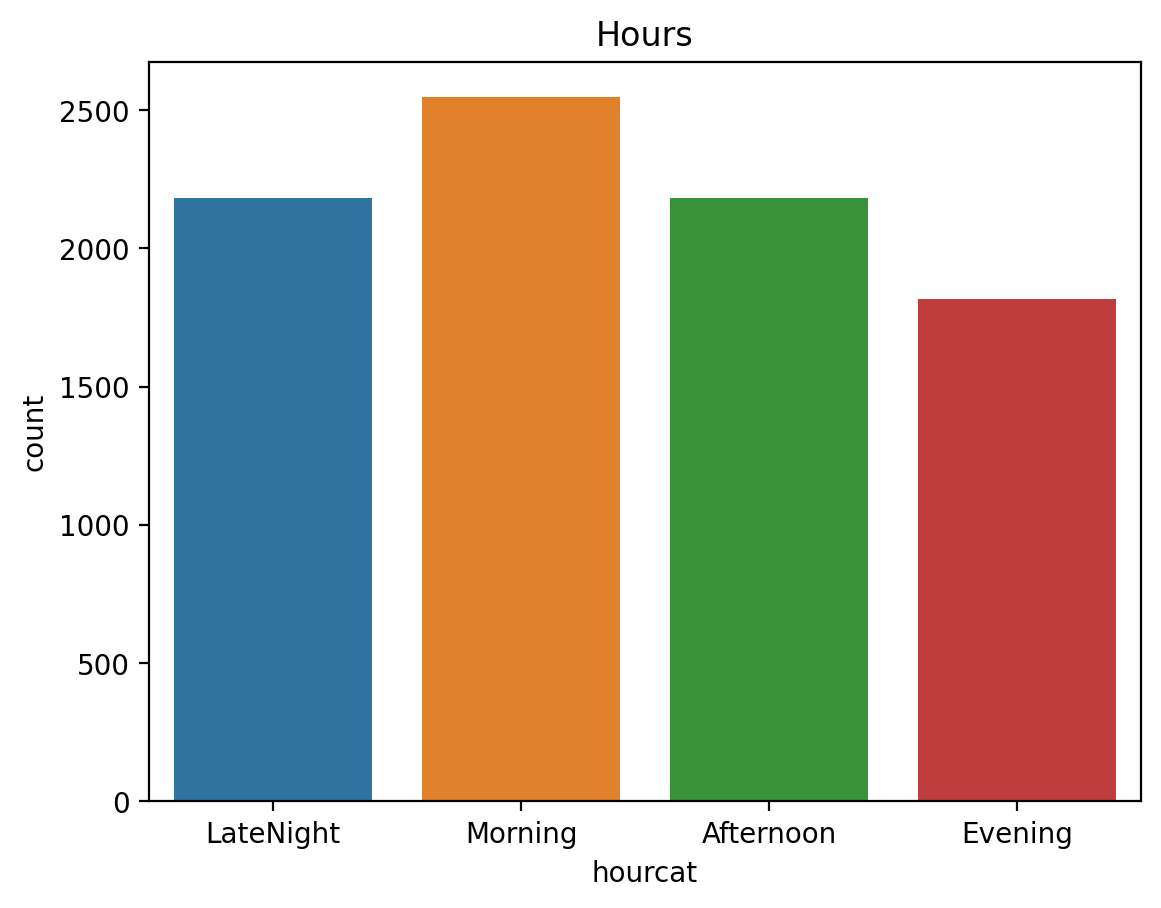

In [424]:
#시간대에 따른 따릉이 대여량의 박스플롯 그리기 

#시간대 나누기 
category=['LateNight','Morning','Afternoon','Evening'] # 시간대 나눌 카테고리 설정하기 
hourcat=pd.cut(x=df2['Hour'],bins=[0,6,13,19,24],labels=category, right=False) #시간대 나누기 
df2['hourcat']=hourcat #데이터 프레임에 새로운 열 생성하기 

#각 시간대 별 개수 
print(df2['hourcat'].value_counts()) 
sns.countplot(x=df2['hourcat'])
plt.title('Hours')
plt.show()

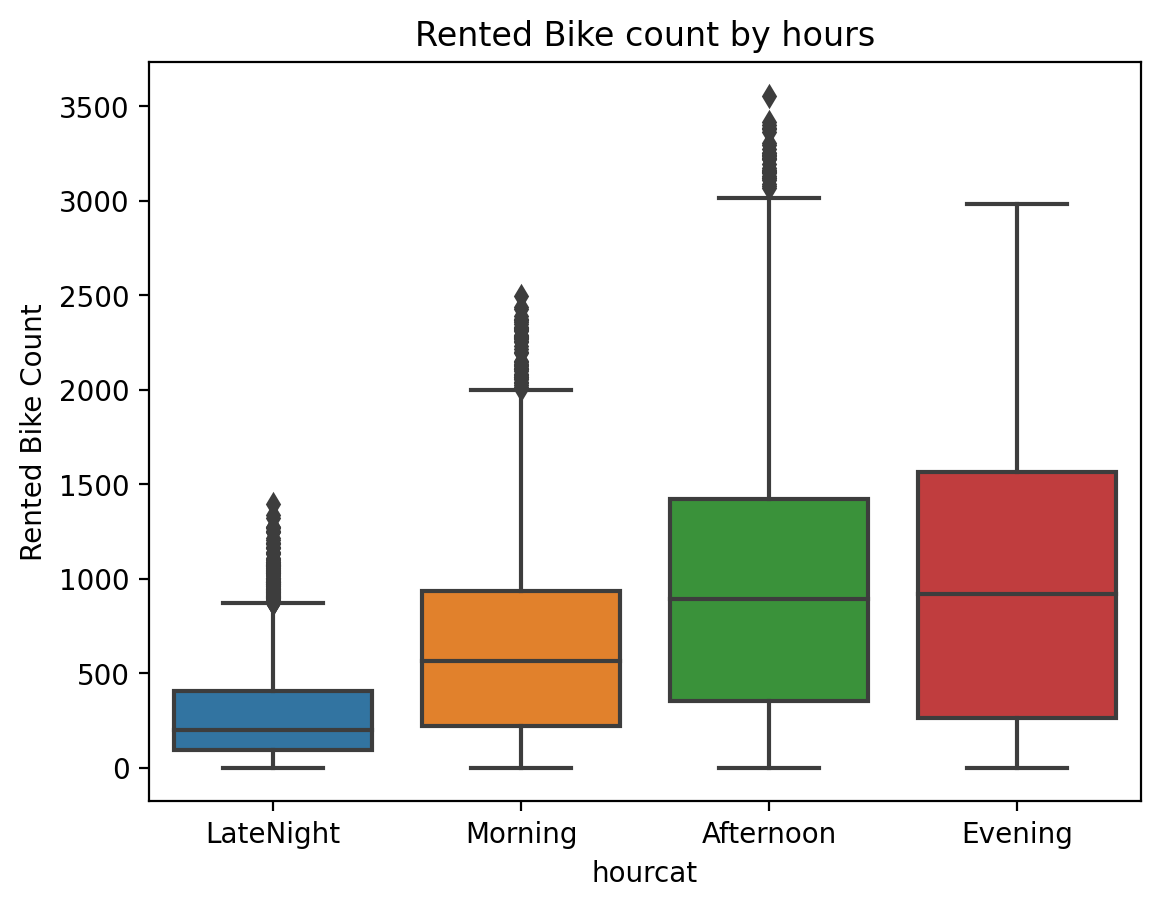

In [425]:
#시간대에 따른 따릉이 대여량 박스플롯 그리기 
sns.boxplot(x=df2['hourcat'], y=df2['Rented Bike Count'])
plt.title('Rented Bike count by hours')
plt.show()

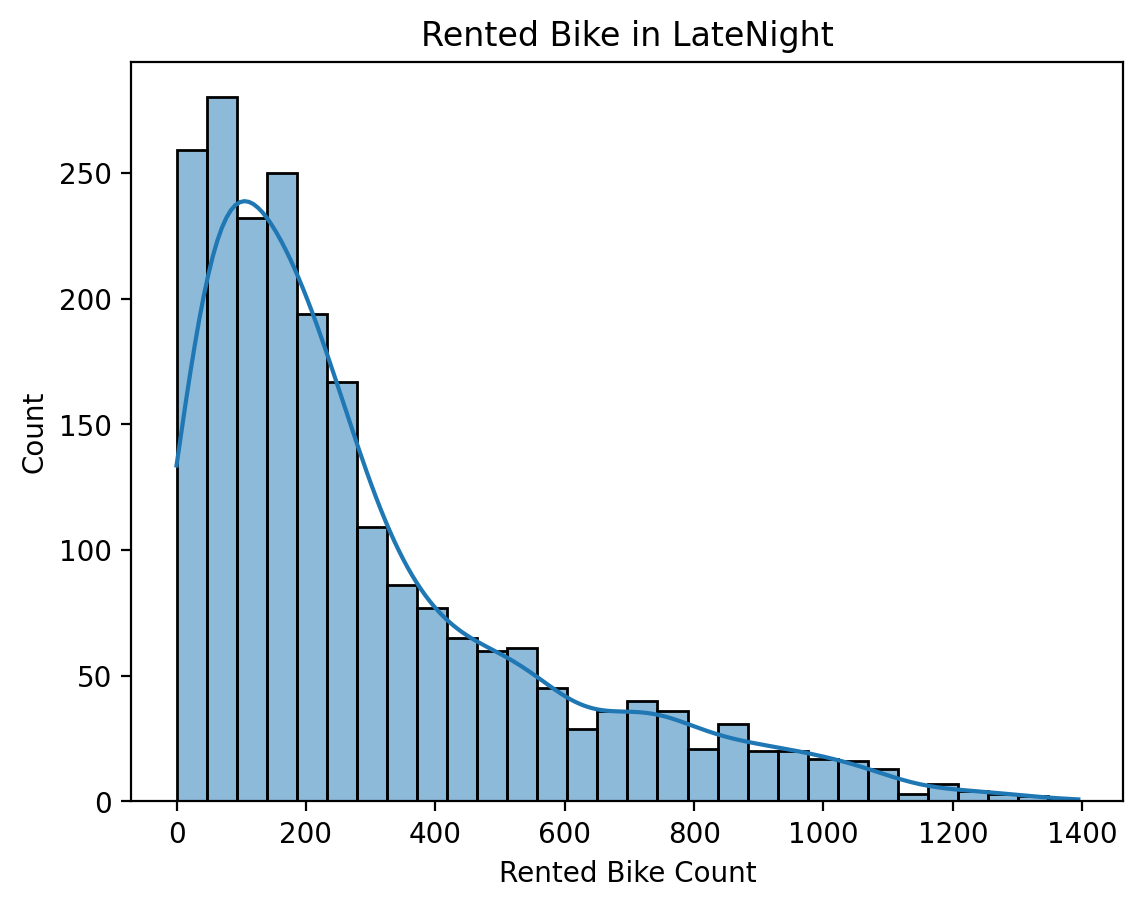

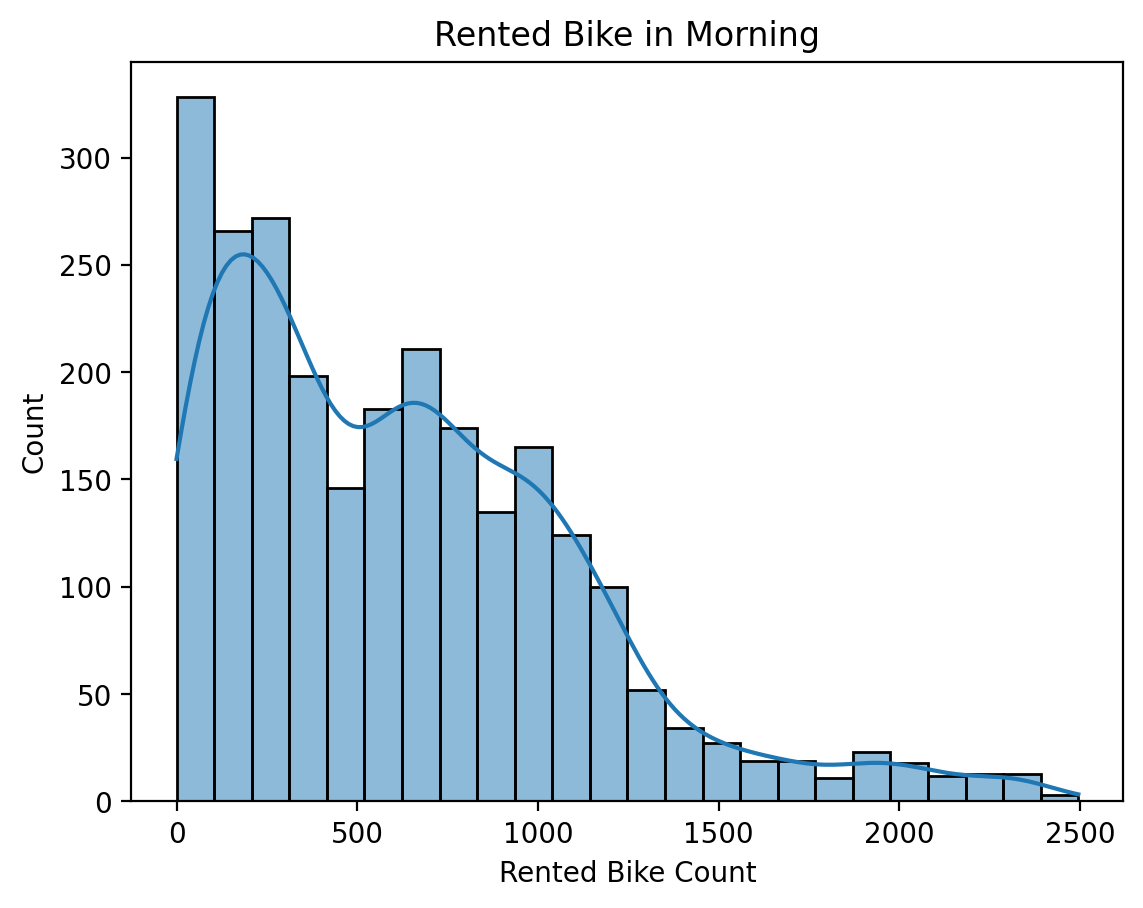

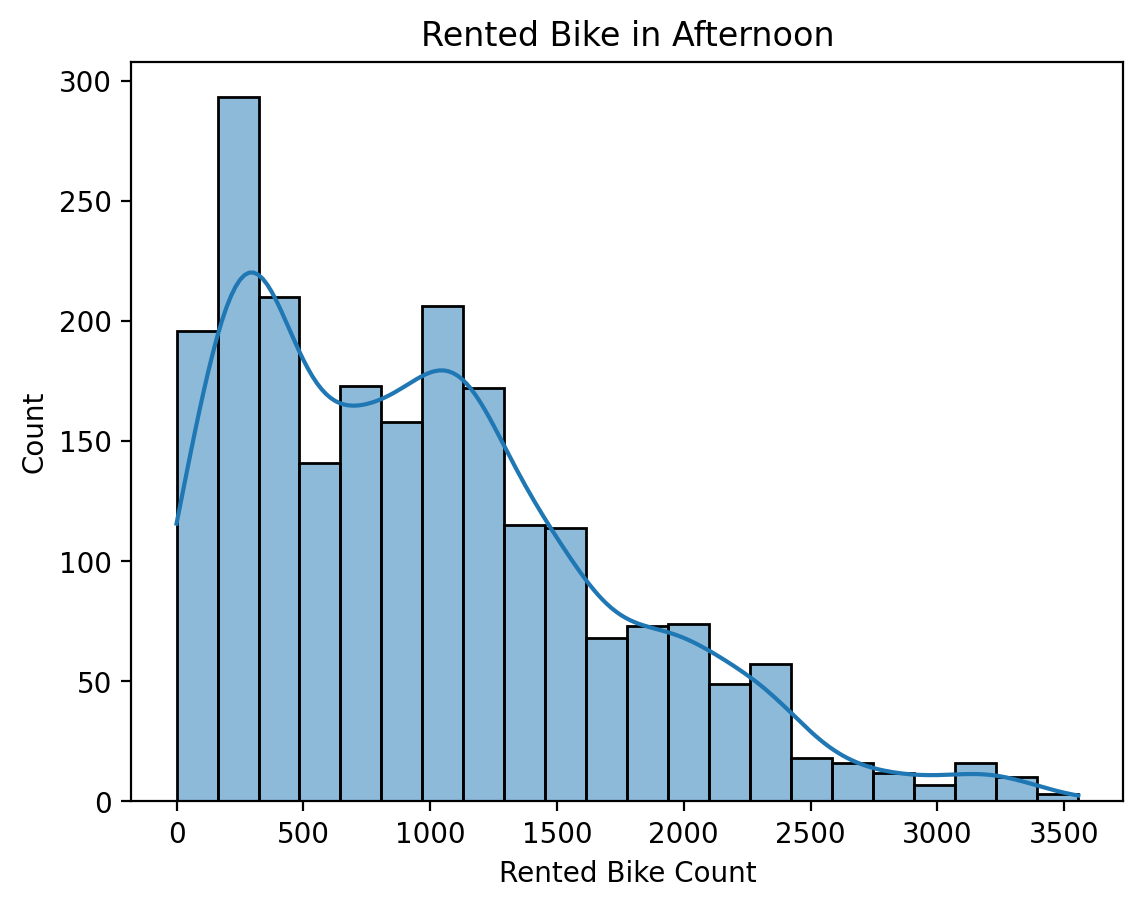

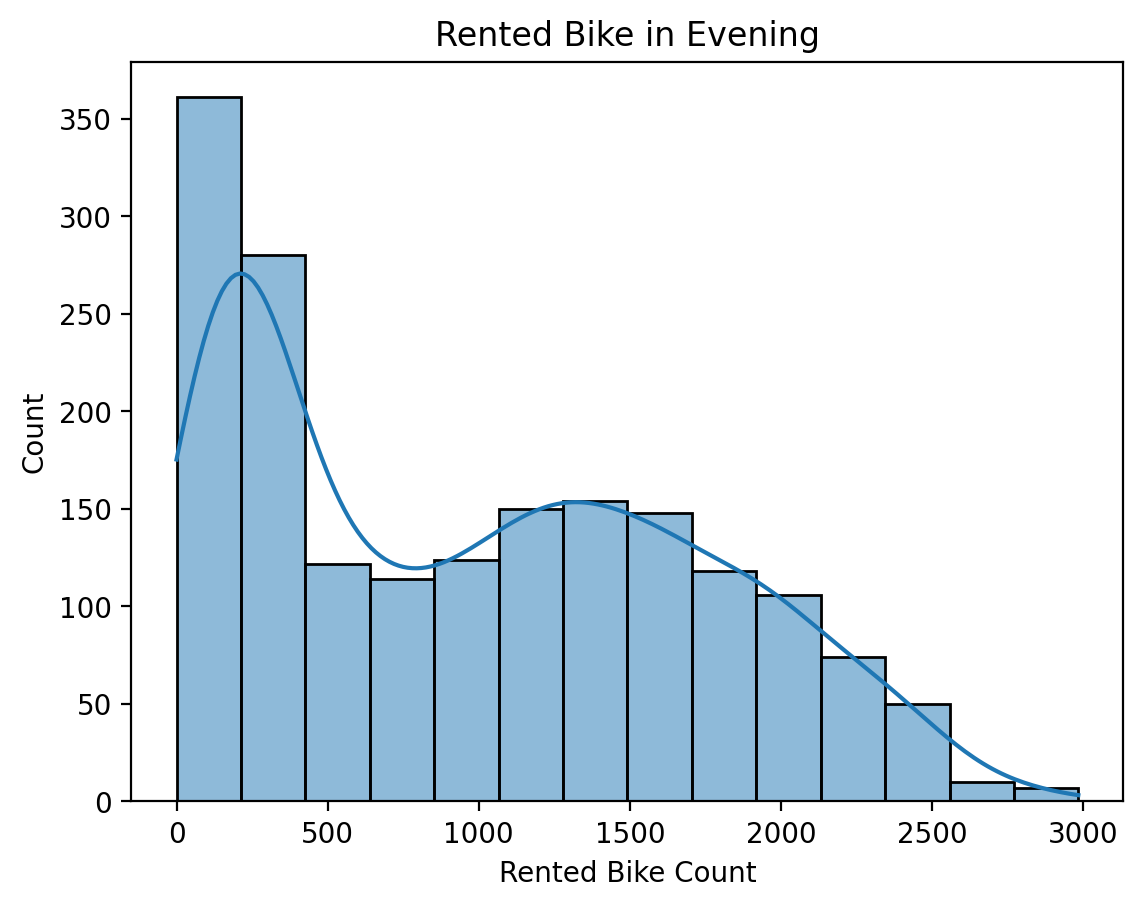

In [426]:
#시간대 별로 나눠서 따릉이 대여량의 히스토그램 그리기 

# LateNight(새벽)의 따릉이 대여량 히스토그램 
sns.histplot(df2[df2['hourcat']=='LateNight']['Rented Bike Count'],kde=True)
plt.title('Rented Bike in LateNight')
plt.show()

#Morning(아침)의 따릉이 대여량 히스토그램
sns.histplot(df2[df2['hourcat']=='Morning']['Rented Bike Count'],kde=True)
plt.title('Rented Bike in Morning')
plt.show()

#Afternooon(오후)의 따릉이 대여량 히스토그램 
sns.histplot(df2[df2['hourcat']=='Afternoon']['Rented Bike Count'],kde=True)
plt.title('Rented Bike in Afternoon')
plt.show()

#Evening( 저녁)의 따릉이 대여량 히스토그램 
sns.histplot(df2[df2['hourcat']=='Evening']['Rented Bike Count'], kde=True)
plt.title('Rented Bike in Evening')
plt.show()


#### 따릉이 대여량은 출근시간과 퇴근시간에 가장 활발하게 이용될 것이라고 생각했으나
#### 의외로 오후 시간에도 많이 이용한다는 것을 알 수 있다.

#### 또한 새벽시간에 가장 적게 이용하는 것을 알 수 있다.

## 계절 변수

Seasons
Spring     2208
Summer     2208
Autumn     2184
Winter     2160
dtype: int64


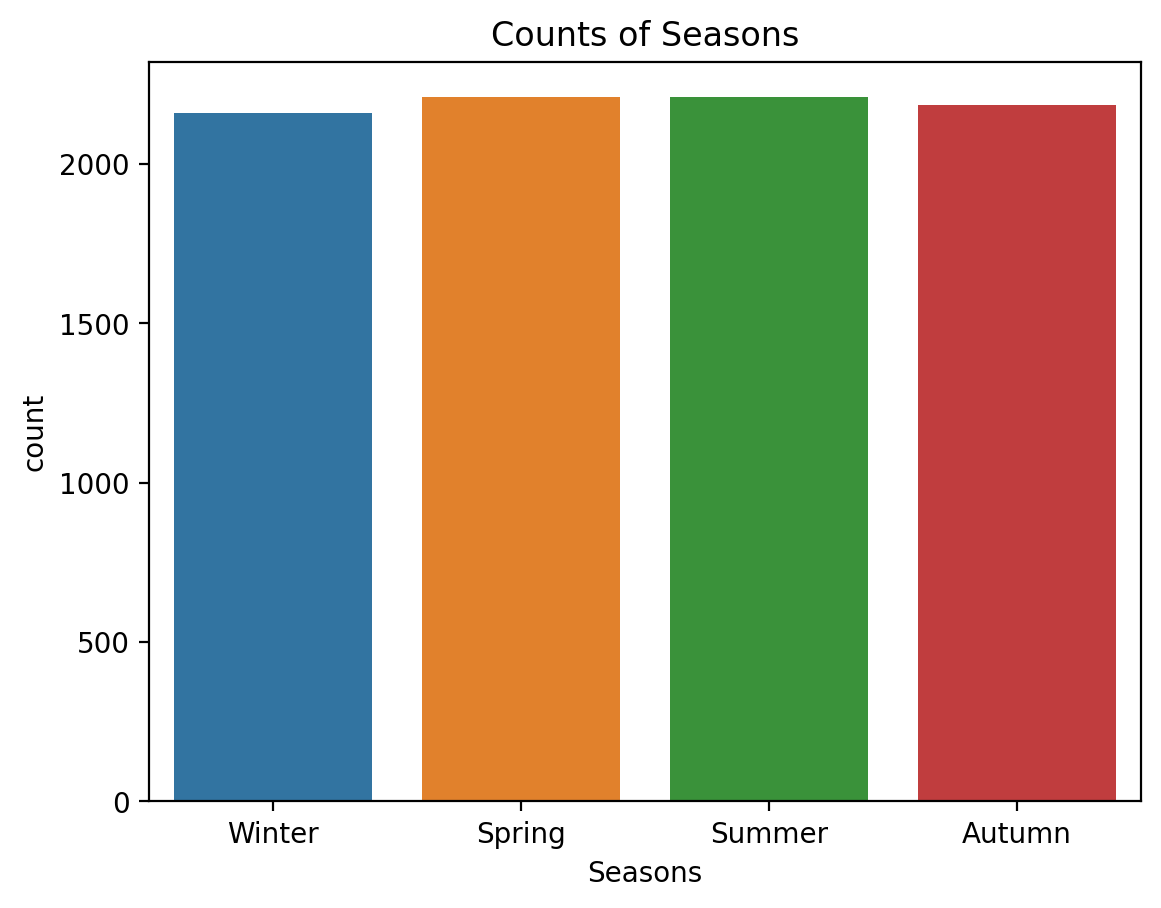

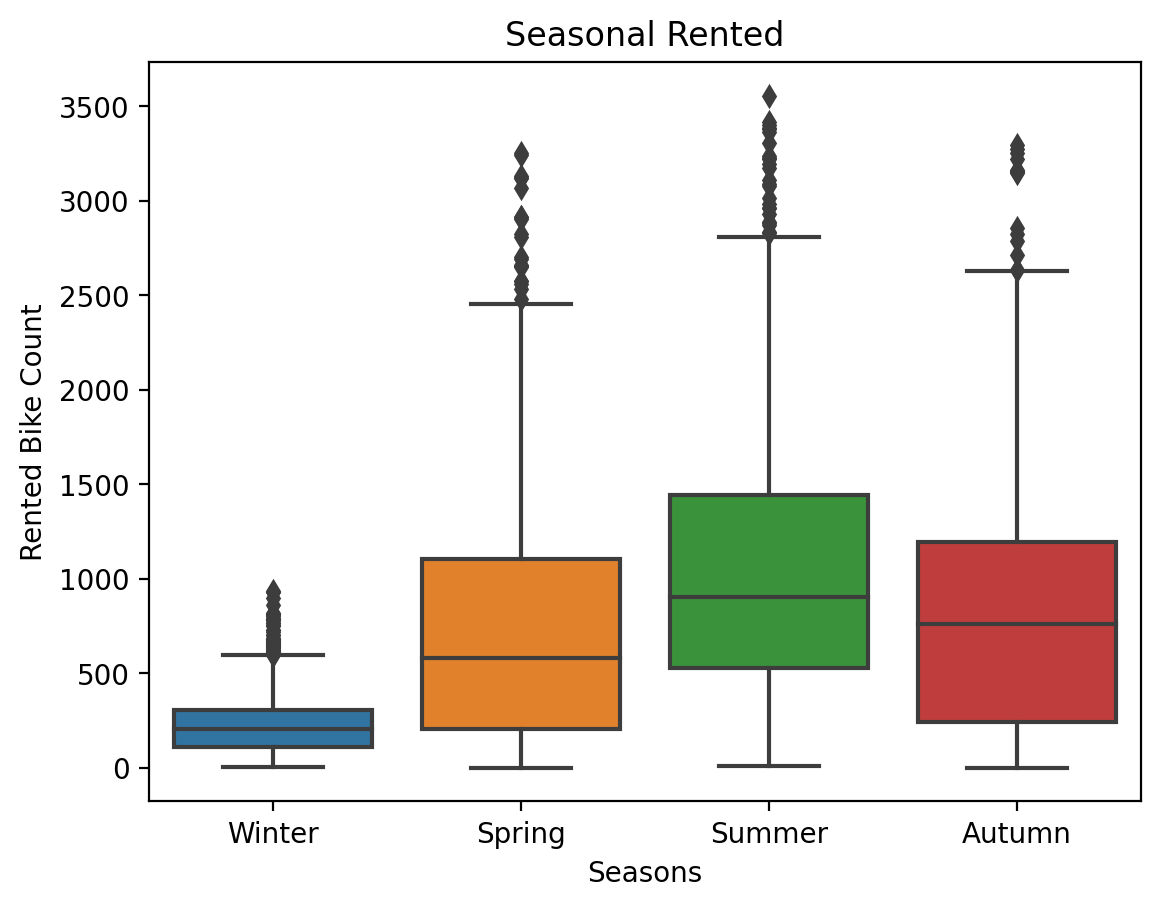

In [67]:
#데이터에서 계절의 수 확인하기 
print(df[['Seasons']].value_counts())
sns.countplot(x='Seasons',data=df)
plt.title('Counts of Seasons')
plt.show()

#계절에 따른 따릉이 대여량 수 확인하기 -boxplot 
sns.boxplot(x='Seasons',y='Rented Bike Count' , data=df)
plt.title('Seasonal Rented')
plt.show()



#### 겨울에 평균 따릉이 대여량의 수가 가장 적고 여름이 가장 많았다

## 휴일 변수

Holiday   
No Holiday    8300
Holiday        429
dtype: int64


<Axes: xlabel='Holiday', ylabel='count'>

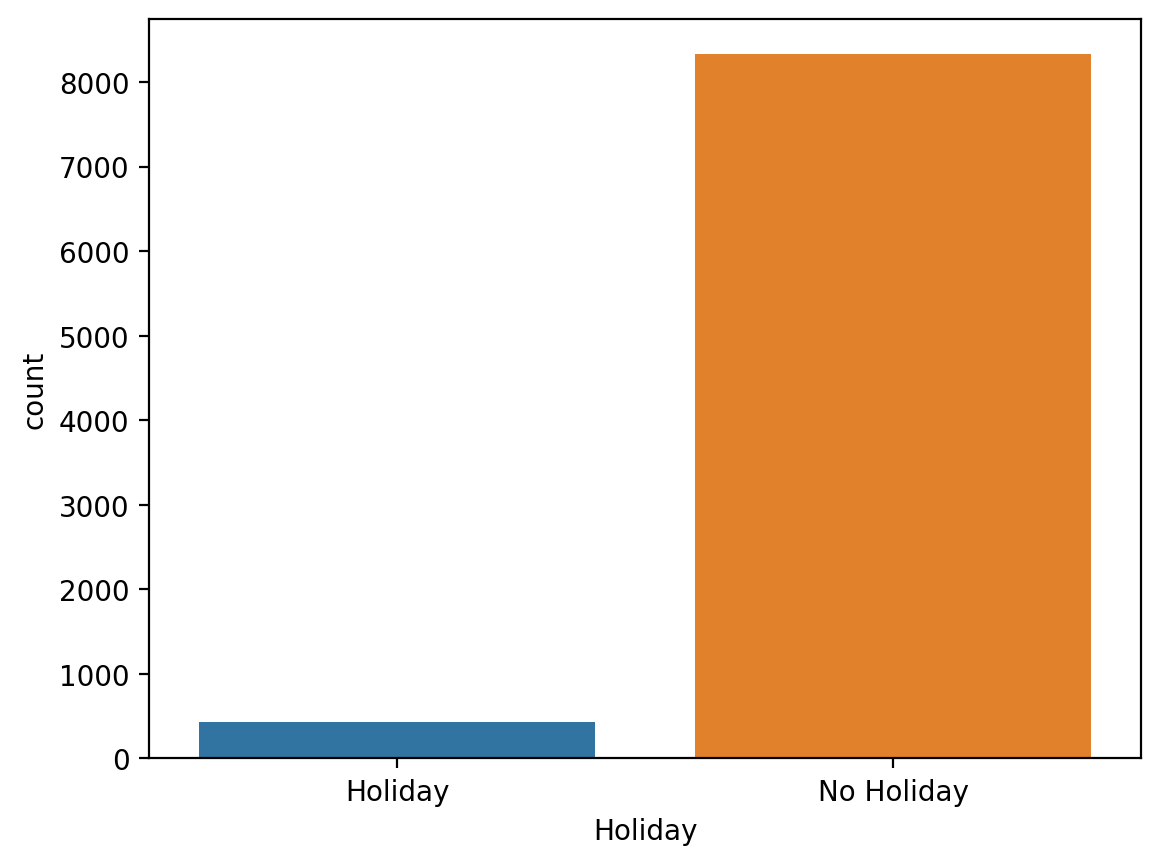

In [427]:
#휴일인 날과 아닌 날의 barplot 그리기
print(df2[['Holiday']].value_counts())
sns.countplot(x='Holiday',data=df)

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

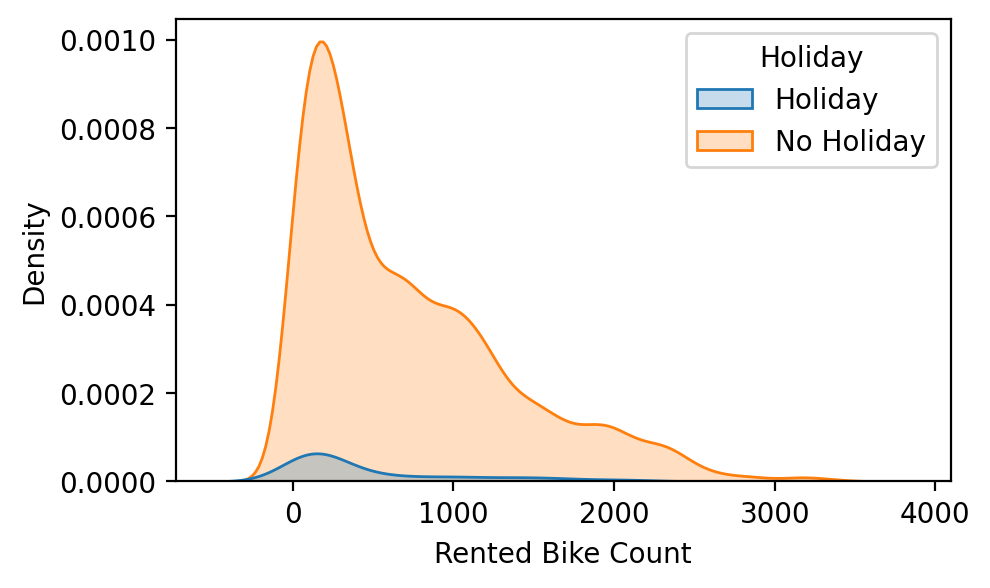

In [428]:
## holiday일때와 no holiday 일때의 따릉이 대여량 히스토그램 분포를 같이 나타내기 

plt.figure(figsize=(5,3))
sns.kdeplot(x='Rented Bike Count', data=df2, hue='Holiday', shade=True )



## 날짜 변수

In [418]:
df2['Date']

0      2017-12-01
1      2017-12-01
2      2017-12-01
3      2017-12-01
4      2017-12-01
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8729, dtype: datetime64[ns]

In [417]:
len(df2['Date'].unique())

365

#### 1년치의 데이터를 가지고 분석하는 것임을 알 수 있다